# Project outline
现实世界的数据通常都不干净。使用 Python 以及 Python 的库，可以收集各种来源、各种格式的数据，评估数据的质量和整洁度，然后进行清洗。这个过程叫做数据整理。可以在 Jupyter Notebook 中记录并展示数据整理的过程，然后使用 Python (及其库) 和/或 SQL 进行分析和可视化

整理 (以及分析和可视化) 的数据集是推特用户[@dog_rates](https://twitter.com/dog_rates)推特昵称为 WeRateDogs。WeRateDogs 是一个推特主，他以诙谐幽默的方式对人们的宠物狗评分。这些评分通常以 10 作为分母。但是分子则一般大于 10：11/10、12/10、13/10 等等。为什么会有这样的评分？因为["They're good dogs Brent."](https://knowyourmeme.com/memes/theyre-good-dogs-brent)WeRateDogs 拥有四百多万关注者，曾受到国际媒体的报道。WeRateDogs 下载了他们的推特档案，专门为本项目使用。这个档案是基本的推特数据（推特 ID、时间戳、推特文本等），包含了截止到 2017 年 4 月 1 日的 5000 多条推特

本项目需要软件
+ pandas
+ numpy
+ requests
+ tweepy
+ json
## 项目动机
### 背景
目标：清洗 WeRateDogs 推特数据，创建有趣且可靠的分析和可视化。这份推特档案很棒，但是只包含基本的推特信息。要达到 "Wow!" 的效果，在分析和可视化前，还需要收集额外的数据、然后进行评估和清洗
### 数据
#### 完善推特档案
WeRateDogs 的推特档案包括 5000 多条推特的基本信息，但并不包括所有内容。不过档案中有一列包含每个推特的文本，我用这一列数据提取了评分、狗的名字和“地位”（即 doggo、floofer、pupper 和 puppo）——这使数据得以“完善”。在这 5000 多条中，我只筛选出了 2356 条包含评分的推特数据。
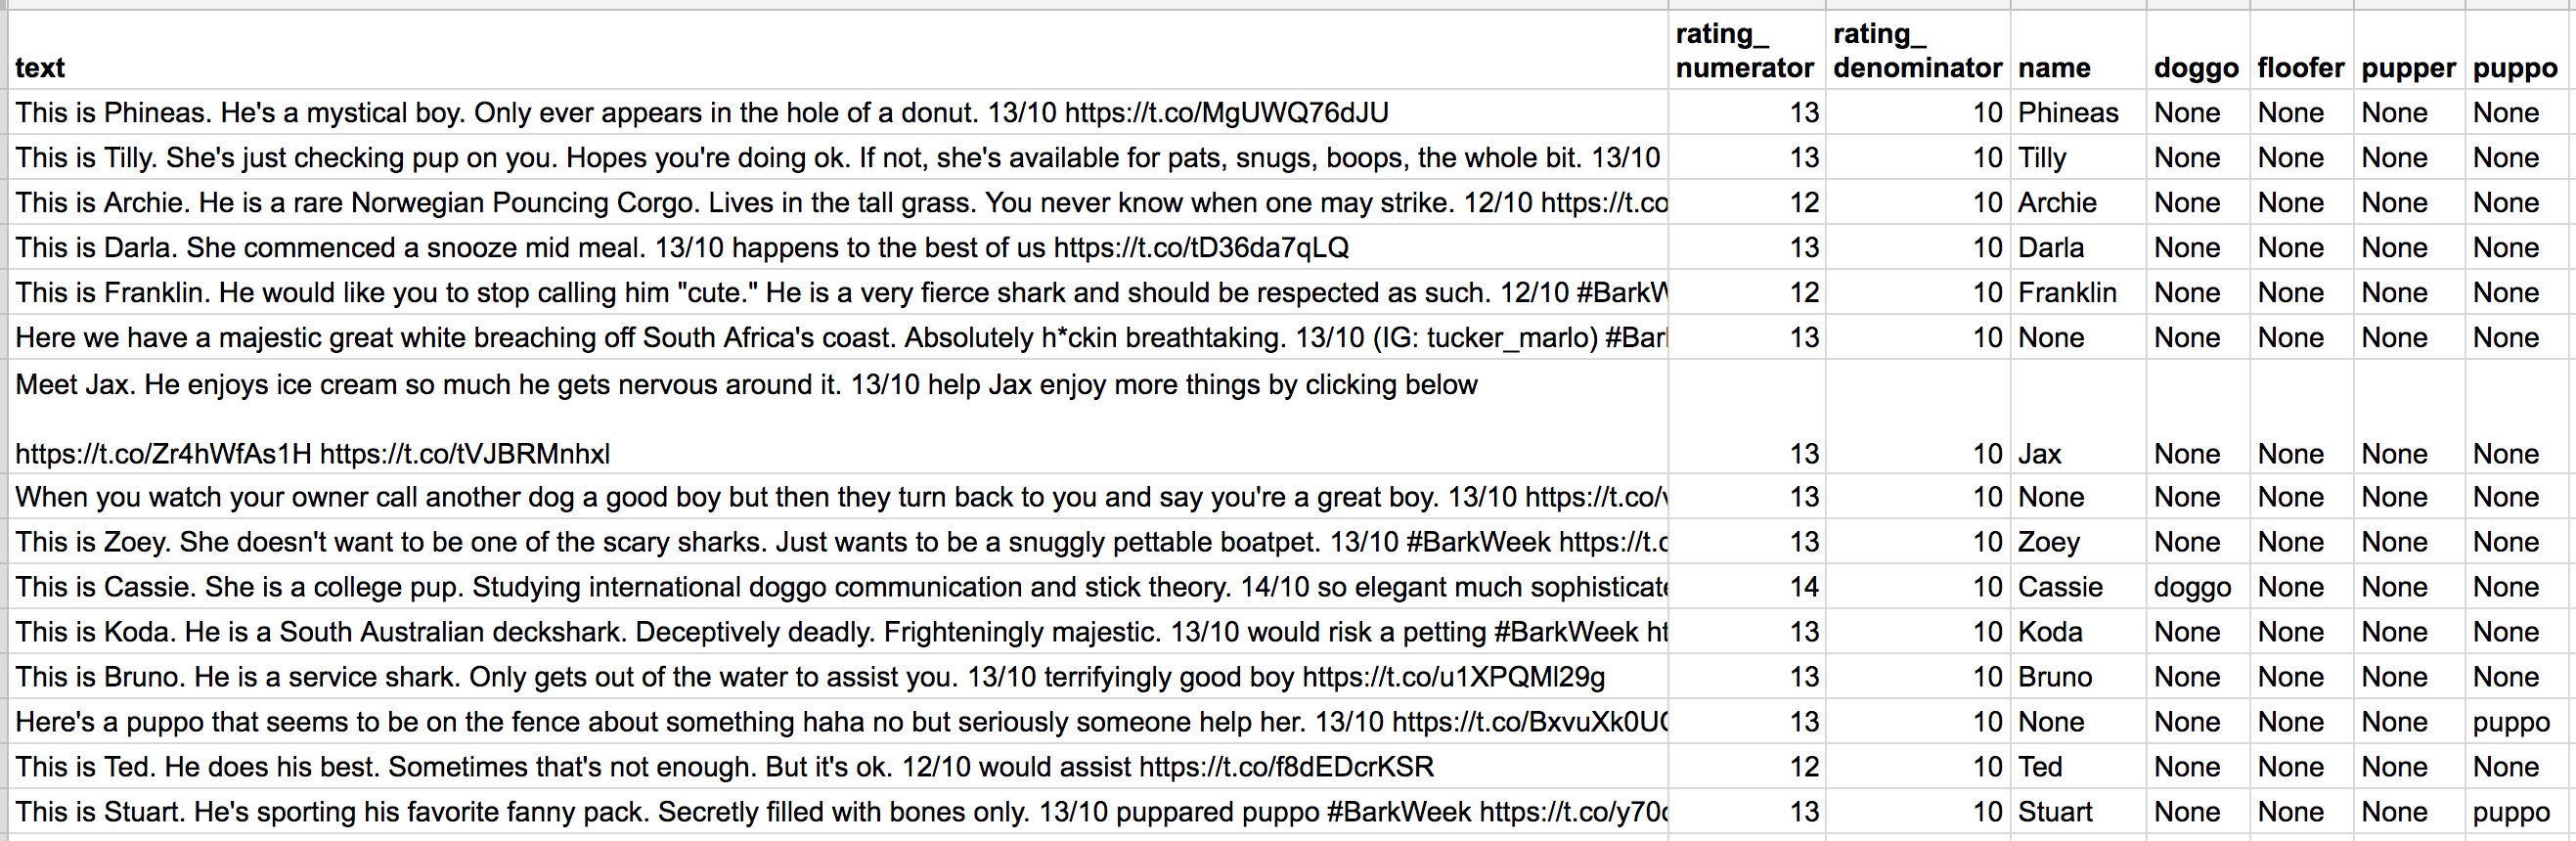
我用编程方式从 text 推特原文中提取了评分、地位和名字等，但是并没有做好。评分并不都是正确的，狗的名字和地位也有不正确的 (狗的地位 stage 参见下面更多相关信息)：doggo,pupper, puppo,floof(er)


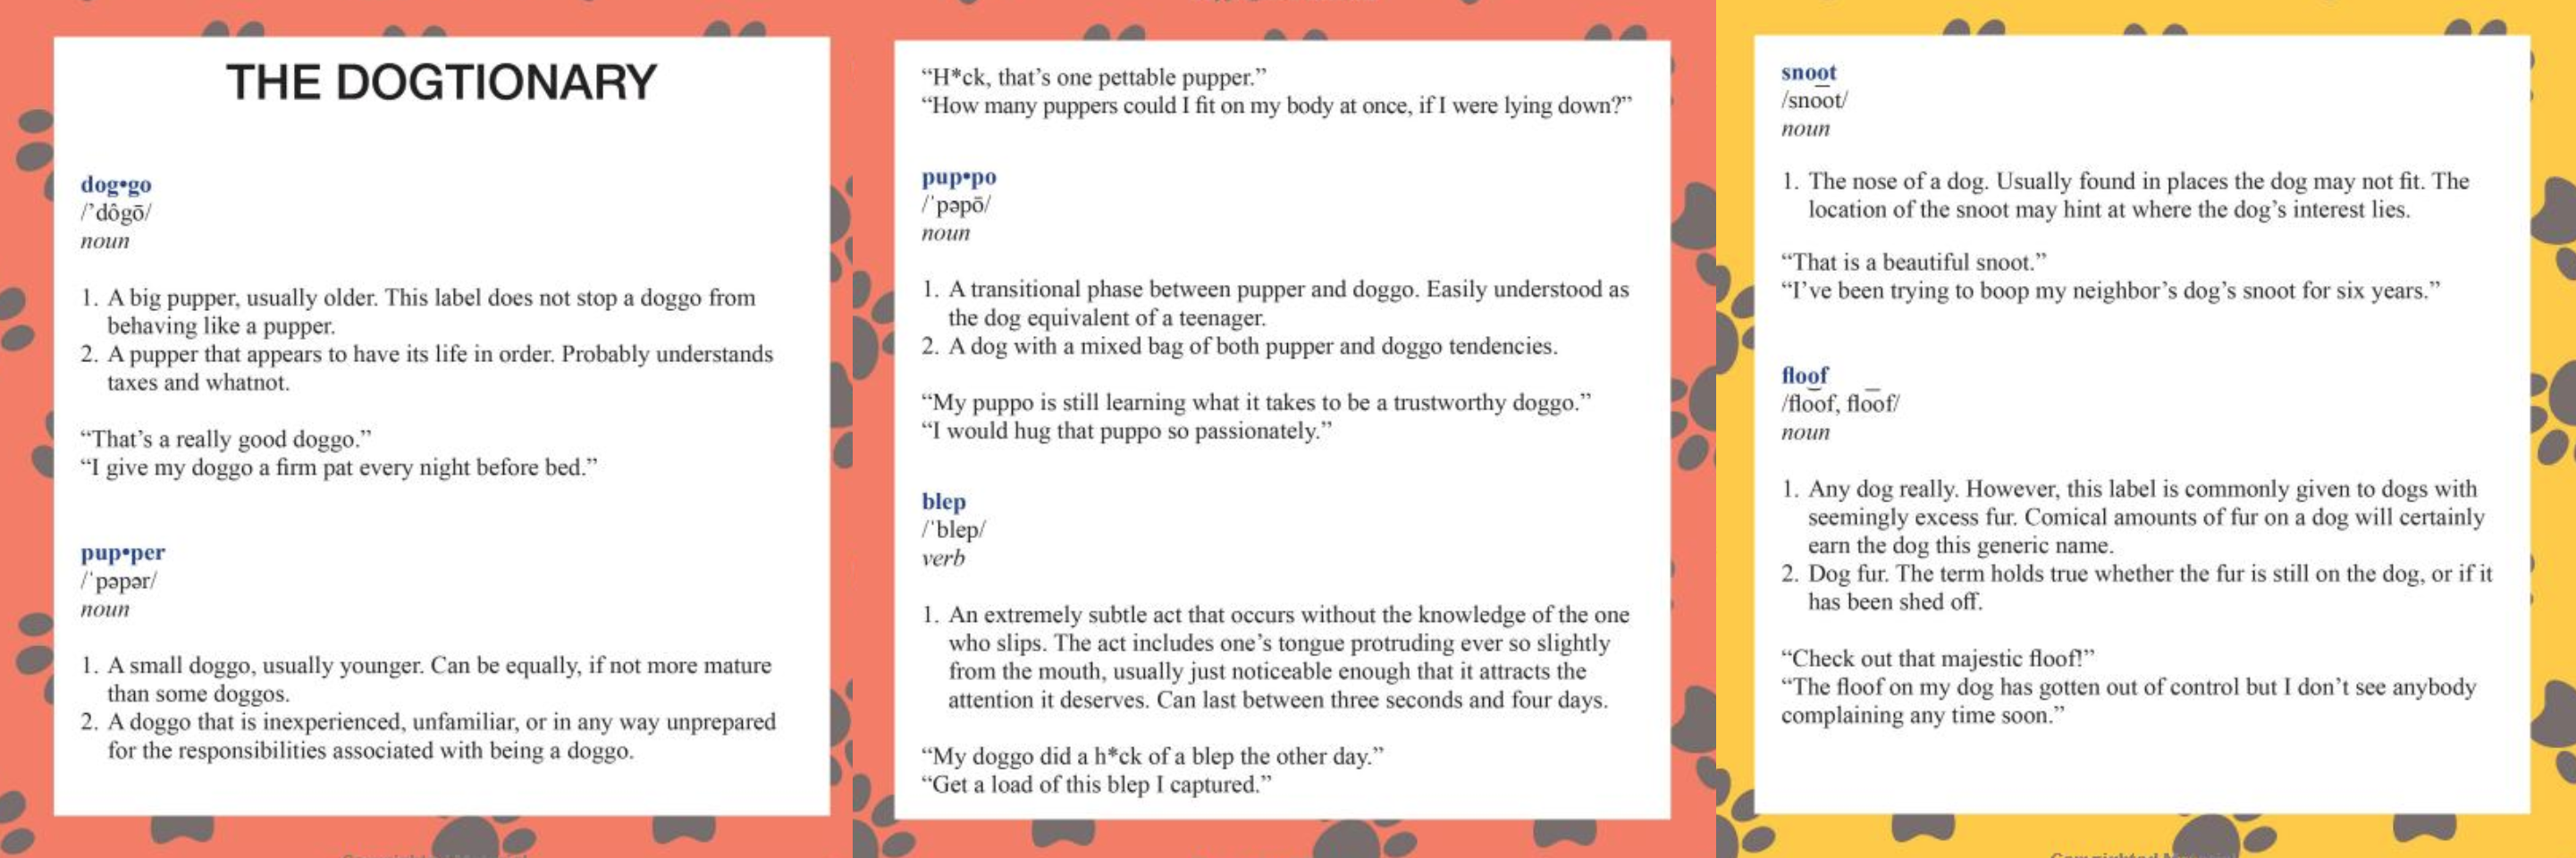

#### 通过推特 API 获取附加数据
回到基础的推特档案：转发数（retweet count）和喜爱数（favorite count）是两个遗漏的列。幸运的是，从推特 API 中，任何人都可以收集到这些数据。其实，"任何人" 只是能获取最多 3000 条的最近推特数据。但是因为你拥有 WeRateDogs 推特档案和其中的推特 ID，你可以收集到这其中所有的 5000 多条推特。你将查询推特 API 来收集这些有价值的数据。
特别提示： 如果你无法访问 Twitter 的话，我将直接给你提供返回的 Twitter 数据。你可以 右键点击这里选择另存为[shuju](https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/tweet_json.txt) 下载。该文件为 txt 格式，每一行为一条独立的 twitter 信息，格式为 JSON
#### 图像预测文件
还有一件更酷的事情：我通过一个可以对狗狗种类进行分类的[神经网络](https://www.youtube.com/watch?v=2-Ol7ZB0MmU)运行这份推特档案中的所有图像。获取的结果：一份图像预测结果表格，其中包含了预测结果的前三名，推特 ID，图像 url 以及最可信的预测结果对应的图像编号（由于推特最多包含 4 个图片，所以编号为 1 到 4）。推特图像预测数据：


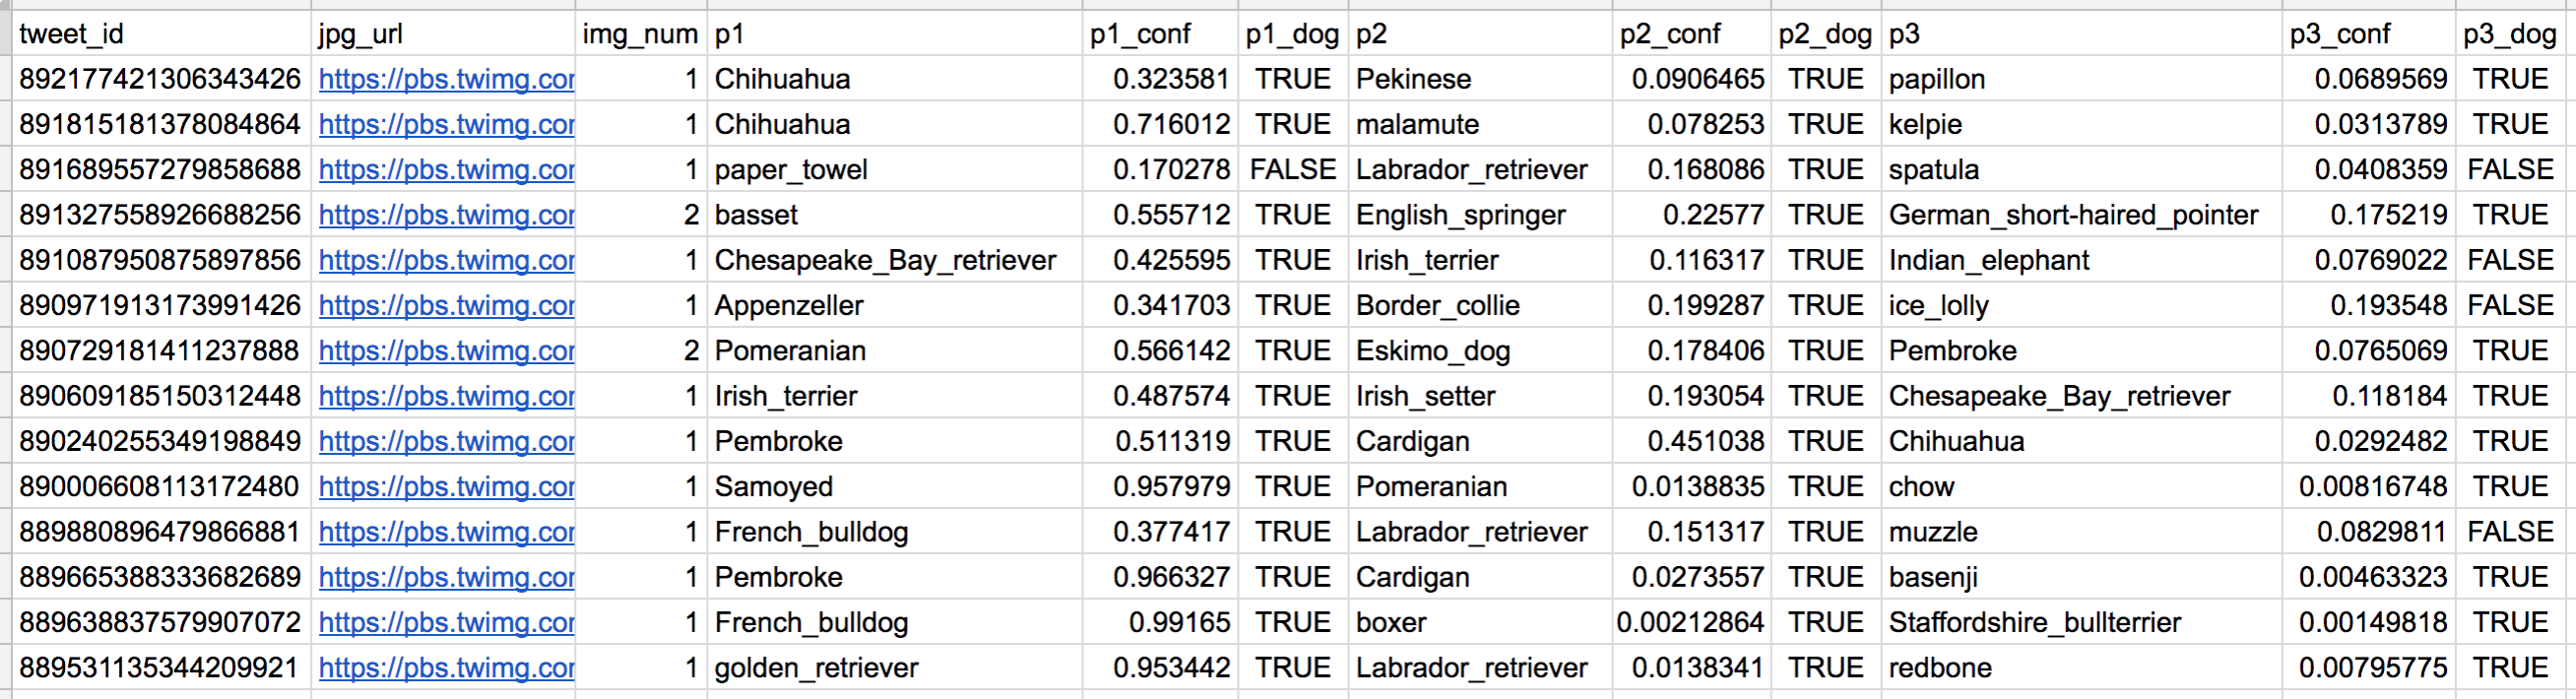

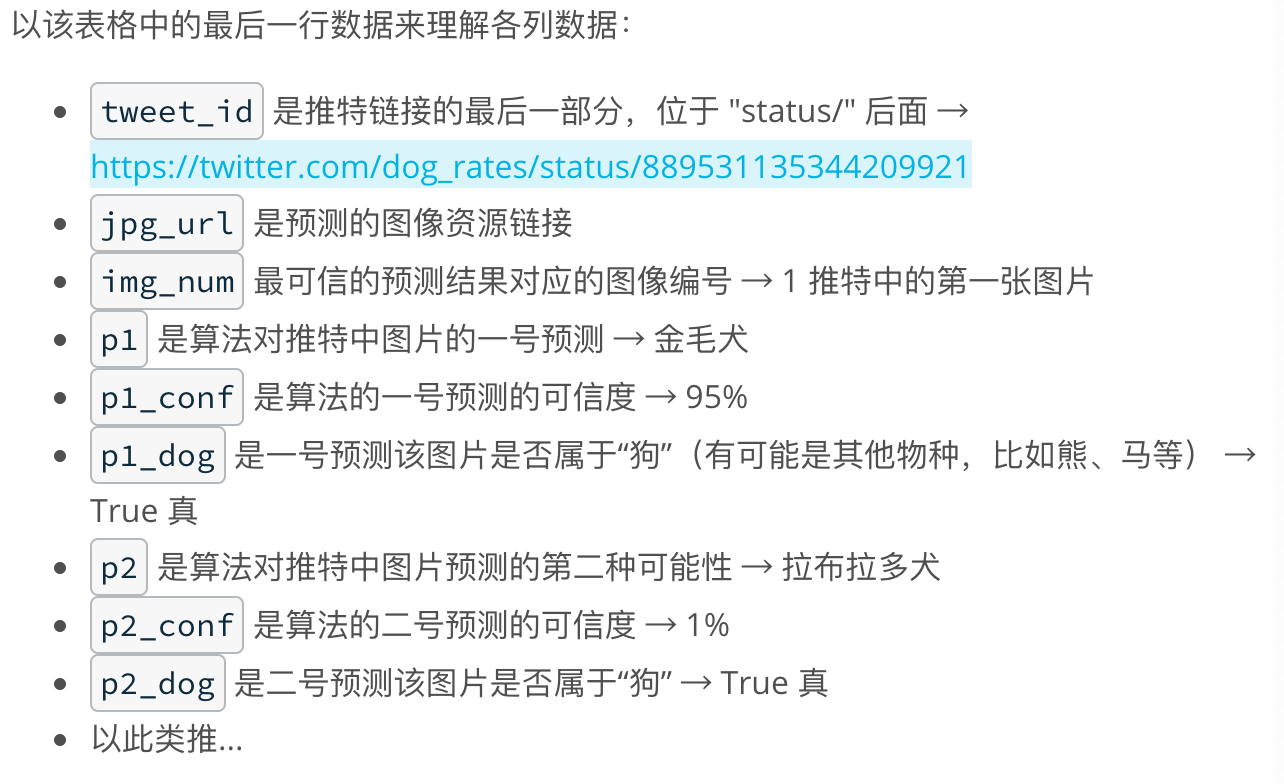

### 关键要点
+ 我们只需要含有图片的原始评级 (不包括转发)。尽管数据集中有 5000 多条数据，但是并不是所有都是狗狗评分，并且其中有一些是转发
+ 完整地评估和清理整个数据集将需要大量时间，实践和展示数据处理技巧没有必要将这个数据集全部清理。因此，本项目只是评估和清理此数据集中的至少 8 个质量问题和至少 2 个整洁度问题
+ 根据 整洁数据 tidy data 的规则要求，本项目的数据清理应该包括将三个数据片段进行合并。
+ 如果分子评级超过分母评级，不需要进行清洗。这个[特殊评分系统](http://knowyourmeme.com/memes/theyre-good-dogs-brent)是 WeRateDogs 人气度较高的主要原因。（同样，也不需要删除分子小于分母的数据）
+ 不必收集 2017 年 8 月 1 日之后的数据，你可以收集到这些推特的基本信息，但是你不能收集到这些推特对应的图像预测数据，因为你没有图像预测算法的使用权限

## 项目细节
### 任务：
+ 整理数据：收集，评估，清洗
+ 对清洗数据进行存储，分析，可视化
+ 书面报告：1数据整理工作2数据分析和可视化

### 其他
#### 在名字为 wrangle_act.ipynb 的 Jupyter Notebook 中收集下面所述的三份数据：

+ WeRateDogs 的推特档案。这个数据文件是直接提供给你的，所以你可以将其当作是“资料来源：手头文件”来收集（参见课程 2：收集数据）

+ 推特图像的预测数据，即根据神经网络，对出现在每个推特中狗的品种（或其他物体、动物等）进行预测的结果。这个文件你需要使用 Python 的 Requests 库和以下提供的 URL 来进行编程下载。下载用的 URL：https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv) 

+ 每条推特的额外附加数据，至少要包含转发数（retweet_count）和喜欢数（favorite_count）这两列，还可以收集任何你觉得有趣的列（注意：如果你的分析中不涉及到其他列则不需要收集）。使用 WeRateDogs 推特档案中的推特 ID，使用 Python Tweepy 库查询 API 中每个推特的 JSON 数据，把所有 JSON 数据存储到一个名为 tweet_json.txt 的文件中。每个推特的 JSON 数据应当写入单独一行。然后将这个 .txt 文件逐行读入一个 pandas DataFrame 中，至少包含tweet ID、retweet_count 和 favorite_count字段。注：不要在项目提交中包含你的推特 API 密钥和访问令牌（可以用 * 号代替）。



#### 对项目数据进行评估
+ 至少 8 个质量问题 和 2 个清洁度问题。要符合项目规范，必须对项目动机中的要求进行评估

#### 对项目数据进行清洗

对你在评估时列出的每个问题进行清洗。在 wrangle_act.ipynb 展示清洗的过程。结果应该为一个优质干净整洁的主数据集（pandas DataFrame 类型） （如果都是以推特 ID 为观察对象的一些特征列，则清理最终只能有一个主数据集，如果有其他观察对象及其对应的特征字段，可以创建其他的数据集，同样需要清理）

#### 对项目数据进行存储、分析和可视化
+ 将清理后的数据集存储到 CSV 文件中，命名为 twitter_archive_master.csv。如果有其他观察对象的数据集存在，需要多个表格，那么要给这些文件合理命名。另外，你也可以把清洗后的数据存储在 SQLite 数据库中（如果这样存储的话，该数据库文件也需要提交）。

+ 在 wrangle_act.ipynb Jupyter Notebook 中对清洗后的数据进行分析和可视化。必须生成至少 3 个见解和 1 个可视化。

#### 项目汇报
+ 创建一个 300-600 字的书面报告，命名为 wrangle_report.pdf，在该报告中简要描述你的数据整理过程。这份报告可以看作是一份内部文档，供你的团队成员查看交流。

+ 创建一个 250 字以上的书面报告，命名为 act_report.pdf，在该报告中，你可以与读者交流观点，展示你使用整理过的数据生成的可视化图表。这份报告可以看作是一份外部文档，如博客帖子或杂志文章。


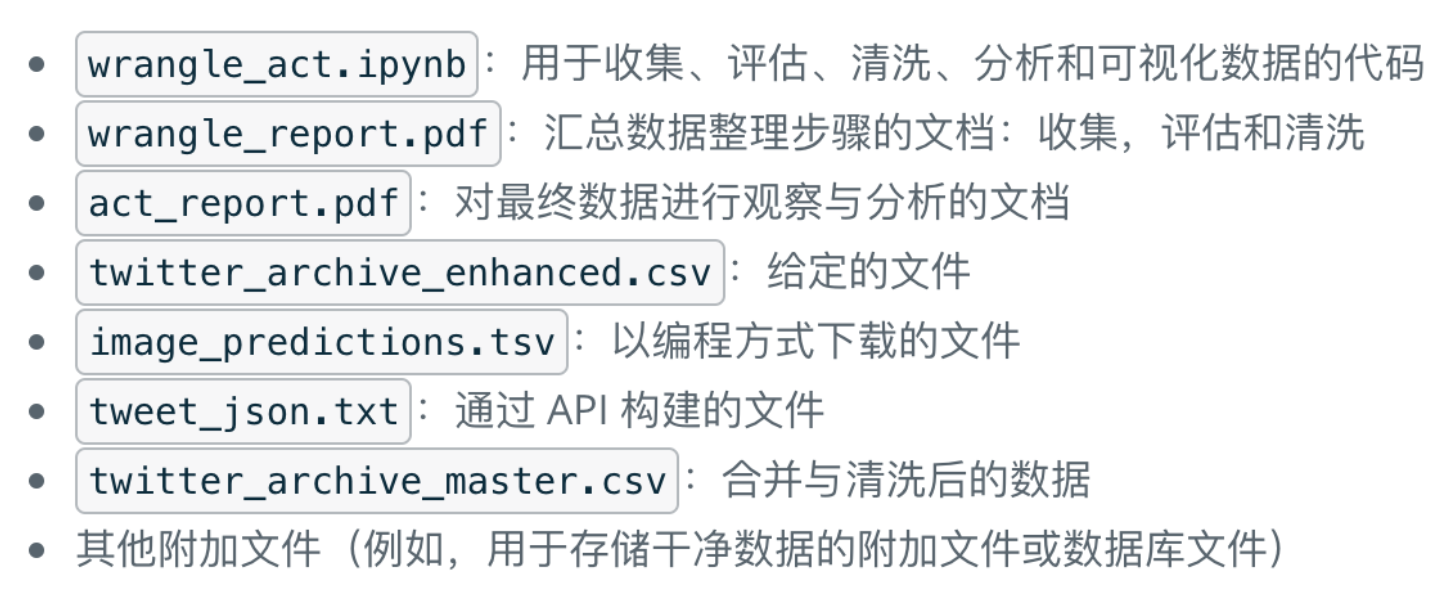

## 查询twitter API
### 如何查询
在这个项目中，使用[ Tweepy ](http://www.tweepy.org/)来查询推特 API，以获取 WeRateDogs 推特档案以外的附加数据。附加数据包括转发用户和喜欢用户

有一些 API 是完全公开的,比如MediaWiki (通过 wptools library 获取)，而其他 API 则需要验证。推特 API 要求用户得到授权之后才能使用。这意味着在你运行 API 查询代码前，你需要配置好自己的推特应用。在此之前，你必须登录推特账户[这份指南](https://www.slickremix.com/docs/how-to-get-api-keys-and-tokens-for-twitter/)描述了配置过程。* 一旦完成配置，一下代码将创建一个 API 对象，用于收集推特数据。该代码由 tweepy 文档中的[Getting started](https://buildmedia.readthedocs.org/media/pdf/tweepy/latest/tweepy.pdf)部分提供

```python
import tweepy

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)
```
推特数据以 JSON 格式存储在 Twitter 上,这个[StackOverflow 答案](https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id)已经做出了清晰描述，教你如何利用 Tweepy 通过推特 ID 获取推特 JSON 数据。注意，在调用 'get_status' 后， 请将参数 tweet_mode 设置为 'extended'，即 api.get_status(tweet_id, tweet_mode='extended')，这将会非常有用。档案中有少数 ID 对应的推特信息也许已经被删除[Try-except 块](https://wiki.python.org/moin/HandlingExceptions)也许会对你很有帮助

### 推特速率限制
推特 API 具有速率限制。速率限制用于控制服务器发出或接收流量的速率。根据推特速率限制信息：

速率限制为 15 分钟的时间间隔。

为了在 WeRateDogs 推特档案中查询所有推特 ID，至少需要 20-30 分钟的运行时间。为了使数据更加整洁，你可以在查询后输出每个推特 ID，并[使用定时器编码](https://stackoverflow.com/questions/7370801/measure-time-elapsed-in-python)也可以在 tweepy.api class 中将参数 wait_on_rate_limit 和 wait_on_rate_limit_notify 设置为 True。
### 编写和读取推特 JSON
查询每个推特 ID 后，你将要编写 JSON 数据，并按要求将其存入 tweet_json.txt 文件中，每个推特 JSON 数据占一行。接着你可以逐行读取这个文件，来创建一个 pandas DataFrame 以便在之后进行数据评估和清洗[使用 Python 在文件中读取和编写 JSON（Reading and Writing JSON to a File in Python](http://stackabuse.com/reading-and-writing-json-to-a-file-in-python/)


## 数据整理cheatsheet
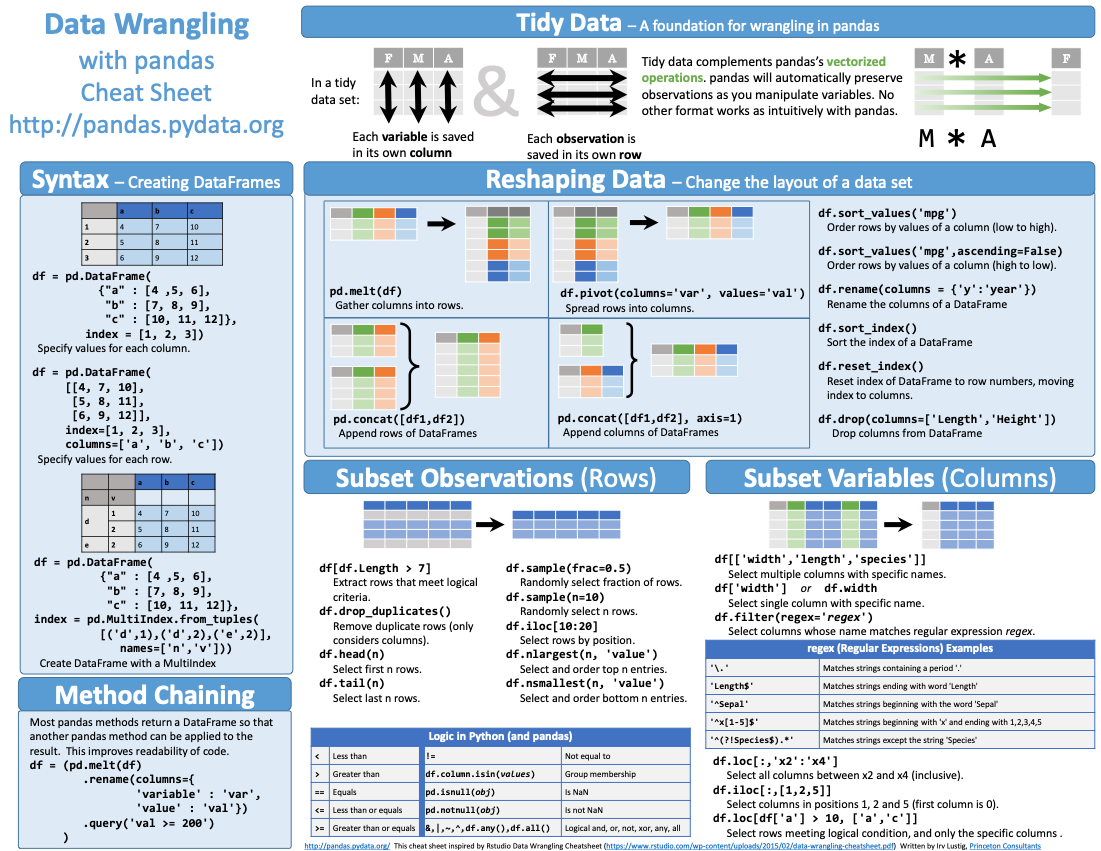

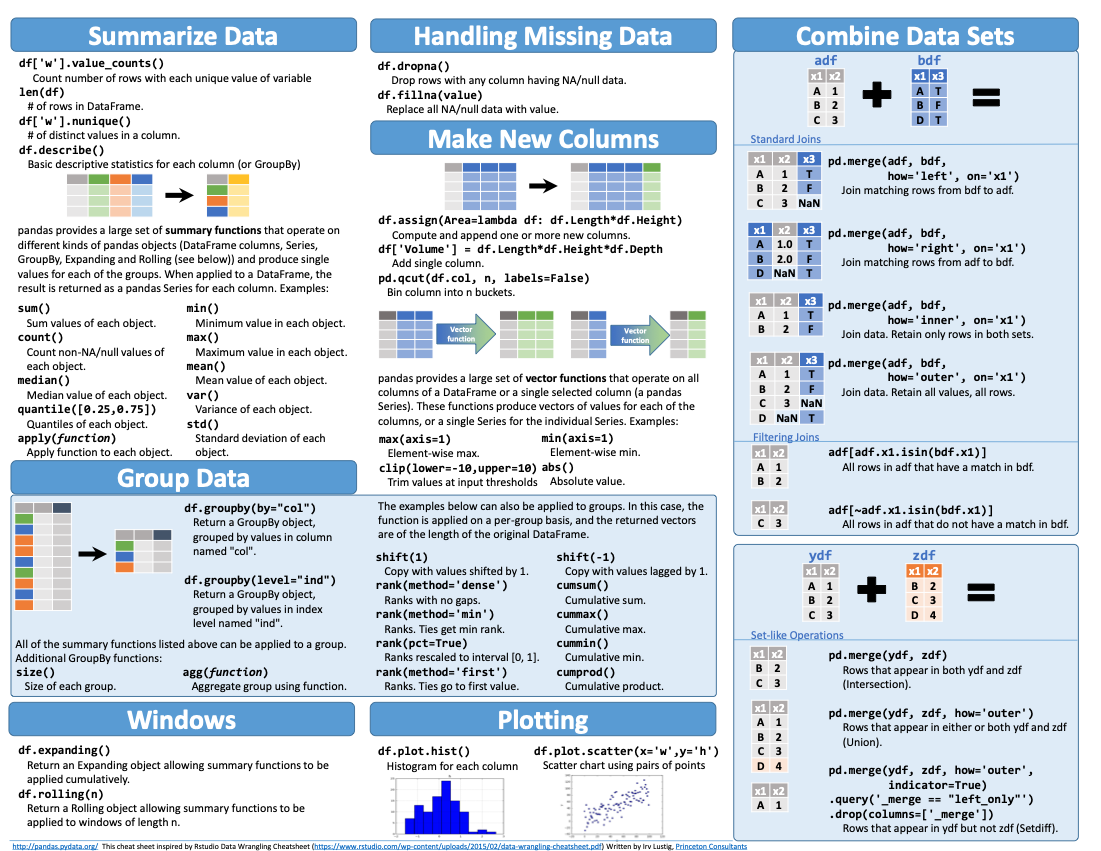

# Gathering
Assess

Clean

In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import tweepy
import json
import os
%matplotlib inline
import seaborn as sns

## gather image_prediciton data 

In [2]:
# image_url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
# request = requests.get(image_url)
# with open('image-predictions.tsv', mode='wb') as file:
#     file.write(request.content)
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')
image_prediction.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

## gather twitter_archive data

In [3]:
#gather twitter_archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.txt')
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

## gather tweet_json data from API

In [4]:
#方法1 
import pprint as pp
with open('tweet_json.txt',encoding='utf-8') as file:
    line = file.readline()
    tweet = json.loads(line)
    #打印下载的json文件完整的一行获取特征信息
    pp.pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
              'media': [{'display_url': 'pic.twitter.com/MgUWQ76dJU',
                         'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
                         'id': 892420639486877696,
                         'id_str': '892420639486877696',
                         'indices': [86, 109],
                         'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
                         'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
                         'sizes': {'large': {'h': 528,
                                             'resize': 'fit',
                                             'w': 540},
                                   'medium': {'h': 528,
                                              'resize': 'fit',
                                    

提取需要的特征列：tweet_id, favorite_count, retweet_count

In [5]:
with open('tweet_json.txt') as file:
    #构造空df
    tweet_json = pd.DataFrame(columns=['tweet_id', 'favorites_count', 'retweet_count'])
    #逐行加载json 数据
    for line in file:
        tweet = json.loads(line)
        tweet_json = tweet_json.append({
            'tweet_id': tweet['id'],
            'favorites_count': tweet['favorite_count'],
            'retweet_count': tweet['retweet_count']
        }, ignore_index=True)

tweet_json.head()

tweet_id favorites_count retweet_count
0  892420643555336193           39492          8842
1  892177421306343426           33786          6480
2  891815181378084864           25445          4301
3  891689557279858688           42863          8925
4  891327558926688256           41016          9721

方法2:读取json 数据还可以使用pandas的read_json函数
```python
df_json = pd.read_json('tweet_json.txt', lines=True)[['id', 'retweet_count', 'favorite_count']]
df_json.columns = ['tweet_id', 'retweet_count', 'favorite_count']
df_json.head()
```

Gather
# Assessing
Clean

## 目测评估

In [6]:
#推特档案
#将每一列的宽度设置为200，以便显示所有内容
pd.set_option('max_colwidth', 200)
twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

> 目测：1.档案数据存在很多大量空值列，2.时间戳timestamp格式有问题，，3.狗狗的地位doggo，floofer，pupper，puppo列是观测值而不是变量,4.狗狗地位列数据类型（None）不正确

In [7]:
#图像预测
image_prediction

tweet_id  \
0     666020888022790149   
1     666029285002620928   
2     666033412701032449   
3     666044226329800704   
4     666049248165822465   
5     666050758794694657   
6     666051853826850816   
7     666055525042405380   
8     666057090499244032   
9     666058600524156928   
10    666063827256086533   
11    666071193221509120   
12    666073100786774016   
13    666082916733198337   
14    666094000022159362   
15    666099513787052032   
16    666102155909144576   
17    666104133288665088   
18    666268910803644416   
19    666273097616637952   
20    666287406224695296   
21    666293911632134144   
22    666337882303524864   
23    666345417576210432   
24    666353288456101888   
25    666362758909284353   
26    666373753744588802   
27    666396247373291520   
28    666407126856765440   
29    666411507551481857   
...                  ...   
2045  886366144734445568   
2046  886680336477933568   
2047  886736880519319552   
2048  886983233522544640   
2049  887101392804085760   
2050  887343217045368832   
2051  887473957103951883   
2052  887517139158093824   
2053  887705289381826560   
2054  888078434458587136   
2055  888202515573088257   
2056  888554962724278272   
2057  888804989199671297   
2058  888917238123831296   
2059  889278841981685760   
2060  889531135344209921   
2061  889638837579907072   
2062  889665388333682689   
2063  889880896479866881   
2064  890006608113172480   
2065  890240255349198849   
2066  890609185150312448   
2067  890729181411237888   
2068  890971913173991426   
2069  891087950875897856   
2070  891327558926688256   
2071  891689557279858688   
2072  891815181378084864   
2073  892177421306343426   
2074  892420643555336193   

                                                                                      jpg_url  \
0                                             https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1                                             https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2                                             https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3                                             https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4                                             https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5                                             https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6                                             https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7                                             https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8                                             https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9                                             https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10                                            https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11                                            https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12                                            https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13                                            https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14                                            https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15                                            https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16                                            https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17                                            https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18                                            https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19                                            https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20                                            https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21                                            https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22                                            ht

In [8]:
#通过推特API获取附加数据，完善推特档案数据
tweet_json

tweet_id favorites_count retweet_count
0     892420643555336193           39492          8842
1     892177421306343426           33786          6480
2     891815181378084864           25445          4301
3     891689557279858688           42863          8925
4     891327558926688256           41016          9721
5     891087950875897856           20548          3240
6     890971913173991426           12053          2142
7     890729181411237888           66596         19548
8     890609185150312448           28187          4403
9     890240255349198849           32467          7684
10    890006608113172480           31127          7584
11    889880896479866881           28208          5116
12    889665388333682689           38745          8502
13    889638837579907072           27633          4705
14    889531135344209921           15329          2309
15    889278841981685760           25712          5635
16    888917238123831296           29555          4681
17    888804989199671297           26021          4535
18    888554962724278272           20267          3722
19    888078434458587136           22144          3637
20    887705289381826560           30690          5584
21    887517139158093824           46940         12053
22    887473957103951883           70007         18813
23    887343217045368832           34223         10713
24    887101392804085760           31045          6147
25    886983233522544640           35786          8045
26    886736880519319552           12286          3420
27    886680336477933568           22802          4597
28    886366144734445568           21488          3297
29    886267009285017600             117             4
...                  ...             ...           ...
2322  666411507551481857             457           337
2323  666407126856765440             113            43
2324  666396247373291520             171            91
2325  666373753744588802             194            99
2326  666362758909284353             801           590
2327  666353288456101888             228            76
2328  666345417576210432             308           146
2329  666337882303524864             203            96
2330  666293911632134144             519           365
2331  666287406224695296             152            71
2332  666273097616637952             183            81
2333  666268910803644416             108            37
2334  666104133288665088           14703          6835
2335  666102155909144576              81            15
2336  666099513787052032             160            73
2337  666094000022159362             168            78
2338  666082916733198337             121            47
2339  666073100786774016             334           173
2340  666071193221509120             154            67
2341  666063827256086533             494           230
2342  666058600524156928             117            61
2343  666057090499244032             304           146
2344  666055525042405380             449           261
2345  666051853826850816            1250           877
2346  666050758794694657             136            60
2347  666049248165822465             111            41
2348  666044226329800704             309           147
2349  666033412701032449             128            47
2350  666029285002620928             132            48
2351  666020888022790149            2528           530

[2352 rows x 3 columns]

## 编程评估
### 推特档案评估

In [9]:
#推特档案数据简明总结
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

> retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp,有非空值，说明是转发的推文，也就是说只需要筛选出这三列为空值的行就可以删除所有转发条目了。这样筛选后，这三列就都为空了，这时才可以移除掉这三列）

> in_reply_to_status_id ，in_reply_to_user_id ，retweeted_status_id ，retweeted_status_timestamp  列出现大量缺失值，应该清理

> 5.tweet_id应该为字符串而不是int型

In [10]:
#检测缺失值（detect missing values）
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [11]:
#生成描述统计趋势的描述性统计数据，数据集分布的分散和形状，不包括 ``NaN``值
twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

>评分列分子分母出现最大值1776，170，需要详细判断

In [12]:
# 指出tweet_id 重复值
twitter_archive.tweet_id.duplicated().sum()

0

In [13]:
#返回rating_numerator列唯一值的数量统计
print(twitter_archive.rating_numerator.value_counts())
len(twitter_archive[twitter_archive.rating_numerator > 15])

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64


26

> 6.评分分子出现很多远大于10的值，可能需要详细调查和清理

In [14]:
#反馈修改调查方法
#调查评分分子大于20，或评分分母不等于10 的数据
twitter_archive.query('rating_denominator!=10 | rating_numerator > 20')[['text', 'rating_numerator', 'rating_denominator']]

text  \
188                                                                                      @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research   
189                                       @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10   
290                                                                                                                                                          @markhoppus 182/10   
313                                                                          @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho   
340                                RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…   
342                                                                                                                                    @docmisterio account started on 11/15/15   
433                                                                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
516   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
695                                            This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763           This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
784                                RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…   
902                                                                                              Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
979                                                                                              This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh   
1068                               After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
1120                                                  Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
1165                                                                                                           Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   
1202                                                      This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1228                                                                              Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
1254                                                               Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
1274                         From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1351                                                                                         Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1433                                                                               Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   
1598                                   Yes I do realiz

> 可以发现分子分母很多异常，通过与text文本对比发现有的属于提取错误，需要重新从文本中提取

自己方法：

```python
print(twitter_archive.rating_denominator.value_counts())
#评分分母不等10的数据
twitter_archive[twitter_archive.rating_denominator != 10]
```

In [15]:
twitter_archive.expanded_urls.sample(10)

1255                                                                                                                                                                              https://vine.co/v/idaTpwH5TgU
1756                                                                                                                                            https://twitter.com/dog_rates/status/678767140346941444/photo/1
2318                                                                                                                                            https://twitter.com/dog_rates/status/666454714377183233/photo/1
288             https://twitter.com/dog_rates/status/838476387338051585/photo/1,https://twitter.com/dog_rates/status/838476387338051585/photo/1,https://twitter.com/dog_rates/status/838476387338051585/photo/1
366                                                                                                                                             https://twitter.com/dog_

In [16]:
twitter_archive.source.sample(5)

2115    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
652     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
471     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1716    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2219    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Name: source, dtype: object

In [17]:
twitter_archive.timestamp.sample(5)

240     2017-03-28 00:07:32 +0000
1818    2015-12-15 02:43:33 +0000
65      2017-06-27 00:10:17 +0000
2202    2015-11-23 04:13:37 +0000
2312    2015-11-18 00:36:17 +0000
Name: timestamp, dtype: object

In [18]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Penny          10
Tucker         10
Lola           10
Winston         9
Bo              9
Sadie           8
the             8
Toby            7
Buddy           7
Daisy           7
Bailey          7
an              7
Dave            6
Oscar           6
Milo            6
Koda            6
Rusty           6
Scout           6
Jax             6
Stanley         6
Bella           6
Leo             6
Jack            6
Larry           5
             ... 
Tug             1
Noosh           1
Pepper          1
Arnold          1
Pavlov          1
Emanuel         1
Richie          1
Jazz            1
Kendall         1
Harry           1
Crumpet         1
Bruiser         1
Orion           1
Ace             1
Longfellow      1
Divine          1
Andy            1
Ulysses         1
Willem          1
Linus           1
Gert            1
Kane            1
Kanu            1
Jebberson       1
Benny     

In [19]:
twitter_archive.text.sample(5)

60        This is Bella. She had her first beach experience this morning. Complete success. 12/10 would perform a sandy boop https://t.co/4VsFysDmiw
1158                               This is Kreggory. He just took a look at his student debt. 10/10 can't even comprehend it https://t.co/XTsZTgilnT
1482                              This is Oscar. He can wave. Friendly af. 12/10 would totally wave back (IG: Oscar.is.bear) https://t.co/waN6EW0wfM
2215    There's a lot going on here but in my honest opinion every dog pictured is pretty fabulous. 10/10 for all. Good dogs https://t.co/VvYVbsi6c3
2068                                                                                       Me running from commitment. 10/10 https://t.co/ycVJyFFkES
Name: text, dtype: object

### 图像预测数据评估

In [20]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
#tweet_id 和jpg_url是否有重复
print(image_prediction.tweet_id.duplicated().sum())
print(image_prediction.jpg_url.duplicated().sum())

0
66


>8.jpg_url出现66个重复项

In [22]:
#三个图像预测都不为的狗的数据
image_prediction[(image_prediction.p1_dog==False) & (image_prediction.p2_dog==False) & (image_prediction.p3_dog==False)]




tweet_id  \
6     666051853826850816   
17    666104133288665088   
18    666268910803644416   
21    666293911632134144   
25    666362758909284353   
29    666411507551481857   
45    666786068205871104   
50    666837028449972224   
51    666983947667116034   
53    667012601033924608   
56    667065535570550784   
69    667188689915760640   
73    667369227918143488   
77    667437278097252352   
78    667443425659232256   
93    667549055577362432   
94    667550882905632768   
96    667724302356258817   
98    667766675769573376   
100   667782464991965184   
106   667866724293877760   
107   667873844930215936   
112   667911425562669056   
115   667937095915278337   
117   668142349051129856   
118   668154635664932864   
123   668226093875376128   
130   668291999406125056   
132   668466899341221888   
140   668544745690562560   
...                  ...   
1839  837482249356513284   
1844  838916489579200512   
1847  839290600511926273   
1851  840370681858686976   
1853  840696689258311684   
1869  844580511645339650   
1886  847962785489326080   
1887  847971574464610304   
1891  849051919805034497   
1892  849336543269576704   
1900  851464819735769094   
1902  851861385021730816   
1905  852226086759018497   
1906  852311364735569921   
1910  853299958564483072   
1931  859074603037188101   
1936  860184849394610176   
1937  860276583193509888   
1940  860924035999428608   
1946  862457590147678208   
1953  863907417377173506   
1956  864873206498414592   
1975  870063196459192321   
1979  870804317367881728   
2012  879050749262655488   
2021  880935762899988482   
2022  881268444196462592   
2046  886680336477933568   
2052  887517139158093824   
2074  892420643555336193   

                                                                                      jpg_url  \
6                                             https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
17                                            https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18                                            https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
21                                            https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
25                                            https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
29                                            https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
45                                            https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg   
50                                            https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg   
51                                            https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg   
53                                            https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg   
56                                            https://pbs.twimg.com/media/CUHkkJpXIAA2w3n.jpg   
69                                            https://pbs.twimg.com/media/CUJUk2iWUAAVtOv.jpg   
73                                            https://pbs.twimg.com/media/CUL4xR9UkAEdlJ6.jpg   
77                                            https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg   
78                                            https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg   
93                                            https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg   
94                                            https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg   
96                                            https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg   
98                                            https://pbs.twimg.com/media/CURiQMnUAAAPT2M.jpg   
100                                           https://pbs.twimg.com/media/CURwm3cUkAARcO6.jpg   
106                                           https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg   
107                                           https://pbs.twimg.com/media/CUTDtyGXIAARxus.jpg   
112                                           ht

> 9.有324个预测数据都不为狗，应该删除？

> 修改：image_predictions表是对推特中图片中狗狗的识别和预测，从预测结果中存在可信度这样的列来看，就可以了解到预测结果不一定是正确的，而预测为不是狗狗的数据有 300+，在总数据量只有2000左右数据集中，这样的删除需要慎重，不推荐使用预测的结果来删除原始数据。
以 tweet_id 为 892420643555336193 的推特为例，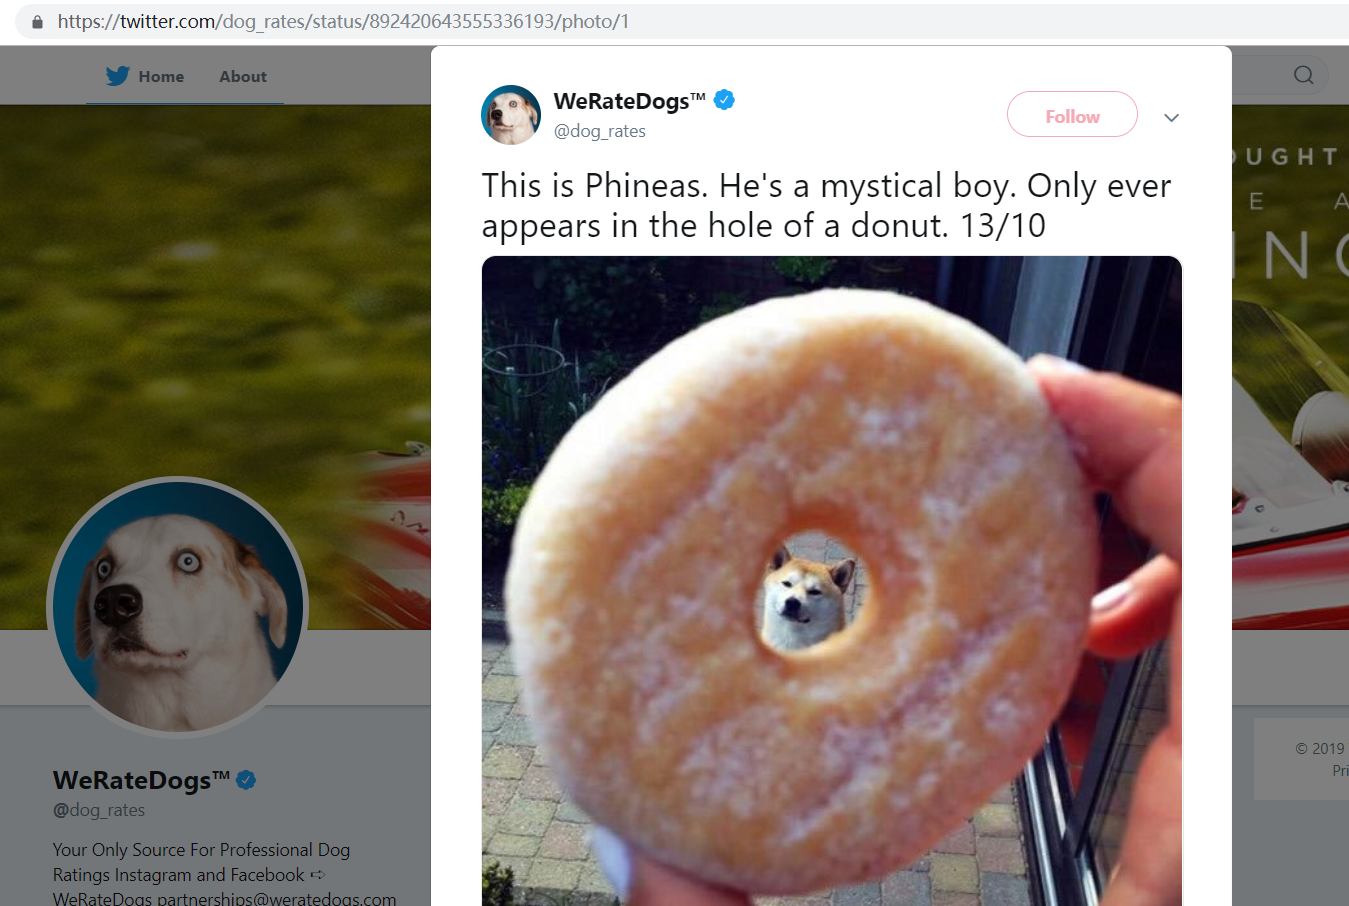它的三个预测结果分别是：orange 橙子，bagel 面包圈，banana 香蕉。。而我们自己可以看到图片实际上确实有狗狗，只是机器学习算法没有识别出来。
微信截图_20190801165106.png
数据清理的时候注意不要随意删除现在看来似乎是无用的数据列，数据整理的过程主要是将数据准备好（检查评估并清洗），以给下一步数据分析做准备，不过数据分析并不是这个项目主要的任务，项目要求数据整理之后只有做简单的分析即可，所以如果是以分析需求来考虑的话，那么可能大部分的数据都不需要保留了

In [23]:
image_prediction.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [24]:
print(image_prediction.img_num.value_counts())
print(image_prediction.p1_dog.value_counts())

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64
True     1532
False     543
Name: p1_dog, dtype: int64


###  tweet_json数据评估

In [25]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id           2352 non-null object
favorites_count    2352 non-null object
retweet_count      2352 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


> 10.favorites_count,retweet_count数据类型不正确，需要清理

In [26]:
tweet_json.describe()

tweet_id  favorites_count  retweet_count
count                 2352             2352           2352
unique                2352             2023           1752
top     667495797102141441                0            745
freq                     1              177              5

## 评估总结

### 质量

#### twitter_archive data issue
1. tweet_id数据类型应该为字符串类型
2. in_reply_to_status_id，in_reply_to_user_id，retweeted_status_id	retweeted_status_user_id	retweeted_status_timestamp列出现大量空值，应该删除
3. 时间戳timestamp列数据不是datatime格式，应该清理
4. 评分列（rating_numerator，）分子数值出现很多大于15的数据，可能需要重新提取
5. 评分列（rating_denominator）分母数值出现不等于10的数值，可能需要重新调查提取
6. **存在转发的条目需要删除**（retweeted_status_id, retweeted_status_user_id 和 retweeted_status_timestamp 是用来判断推特是否属于转发推特的。如果 retweeted_status_id, retweeted_status_user_id 和 retweeted_status_timestamp 中有非空值，说明是转发推特，也就是说只需要筛选出这三列为空值的行就可以删除所有转发条目了。这样筛选后，这三列就都为空了，这时才可以移除掉这三列）
7. **存在无图片的推特需要删除**（对图片预测数据集进行 merge 时选择 inner 方式，这样可以删掉没有图片的推文条目，因为没有图片就不会有图片预测数据。所以这一问题已经在后面的步骤中清洗掉了，只需要在列表中再补充一下，并且在合并数据的地方说明做出了对应的清洗即可！）
6. drop与分析无关的列

####  image_prediciton  data issue
 tweet_id 应该改为字符串
9. jpg_url有66个重复，应该去掉重复列


#### tweety_json data issue
10. 数据类型不正确，tweet_id 应该为字符串，其他特征列应该为数值类型

### 整洁度
11. image_prediciton 预测数据应该是 twitter_archive表格的一部分

12. twitter_archive 数据中doggo	floofer	pupper	puppo 够的地位应该是分类变量，而不是特征列
13. tweety_json 应该是twitter_archive一部分

# Cleaning

In [27]:

twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

## twitter_archive_clean

### issue1: tweet_id数据类型应该为字符串类型

#### define：tweet_id 用户id应该为字符串类型，而不是int64 数值类型

#### code

In [28]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

#### test

In [29]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

### issue 存在转发的条目需要删除 

####  define :retweeted_status_id, retweeted_status_user_id 和 retweeted_status_timestamp 中有非空值，说明是转发推特，也就是说只需要筛选出这三列为空值的行就可以删除所有转发条目了。这样筛选后，这三列就都为空了，这时才可以移除掉这三列

#### code 

In [30]:
#定义转发列
retweeted_col = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
#筛选转发列为空值的行
for i in retweeted_col:
    twitter_archive_clean = twitter_archive_clean[twitter_archive_clean[i].isnull()]



#### test 

In [31]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(2), object(

### issue2: in_reply_to_status_id，等列出现大量空值，应该删除

#### define: drop 出现大量空值的特征列

#### code

In [32]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], 1)


####  test

In [33]:
twitter_archive_clean.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name doggo floofer pupper puppo  
0                13                  10   Phineas  None    None   None  None  
1                13                  10     Tilly  None    None   None  None  
2                12                  10    Archie  None    None   None  None  
3                13                  10     Darla  None    None   None  None  
4                12                  10  Franklin  None    None   None  None

### issue3:时间戳timestamp列数据不是datatime格式，应该清理

#### define: 转换timestamp为datatime格式

#### code 

In [34]:

twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'], format='%Y-%m-%d %H:%M:%S')


#### test 

In [35]:
 twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 220.9+ KB


### issue6:删除与分析无关的列

#### define： drop source列，expanded_urls列，name列

#### code 

In [36]:
twitter_archive_clean = twitter_archive_clean.drop(['source', 'expanded_urls', 'name'], 1)

#### test 

In [37]:
twitter_archive_clean.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

   rating_numerator  rating_denominator doggo floofer pupper puppo  
0                13                  10  None    None   None  None  
1                13                  10  None    None   None  None  
2                12                  10  None    None   None  None  
3                13                  10  None    None   None  None  
4                12                  10  None    None   None  None

In [38]:
twitter_archive_clean.doggo.value_counts()

None     2088
doggo      87
Name: doggo, dtype: int64

### issue: twitter_archive 数据中doggo floofer pupper puppo 狗的地位应该是分类变量，而不是特征列

#### define：将 doggo floofer pupper puppo融合为dog_stage一个特征列，如果出现一个狗狗有2个或两个以上地位描述，则命名为multil，最后删除doggo floofer pupper puppo列

#### code 

In [39]:
stage_list = ['doggo', 'floofer', 'pupper', 'puppo']
for i in stage_list:
    twitter_archive_clean[i] = twitter_archive_clean[i].replace('None', '')
#twitter_archive_clean.head()
twitter_archive_clean['dogs_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

twitter_archive_clean.dogs_stage.value_counts()


                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: dogs_stage, dtype: int64

> 这种赋值会出现警告   ```python
   twitter_archive_clean.dogs_stage[twitter_archive_clean.dogs_stage == 'doggopupper'] = 'multi'
twitter_archive_clean.dogs_stage[twitter_archive_clean.dogs_stage == 'doggofloofer'] = 'multi'
twitter_archive_clean.dogs_stage[twitter_archive_clean.dogs_stage == 'doggopuppo'] = 'multi'
```
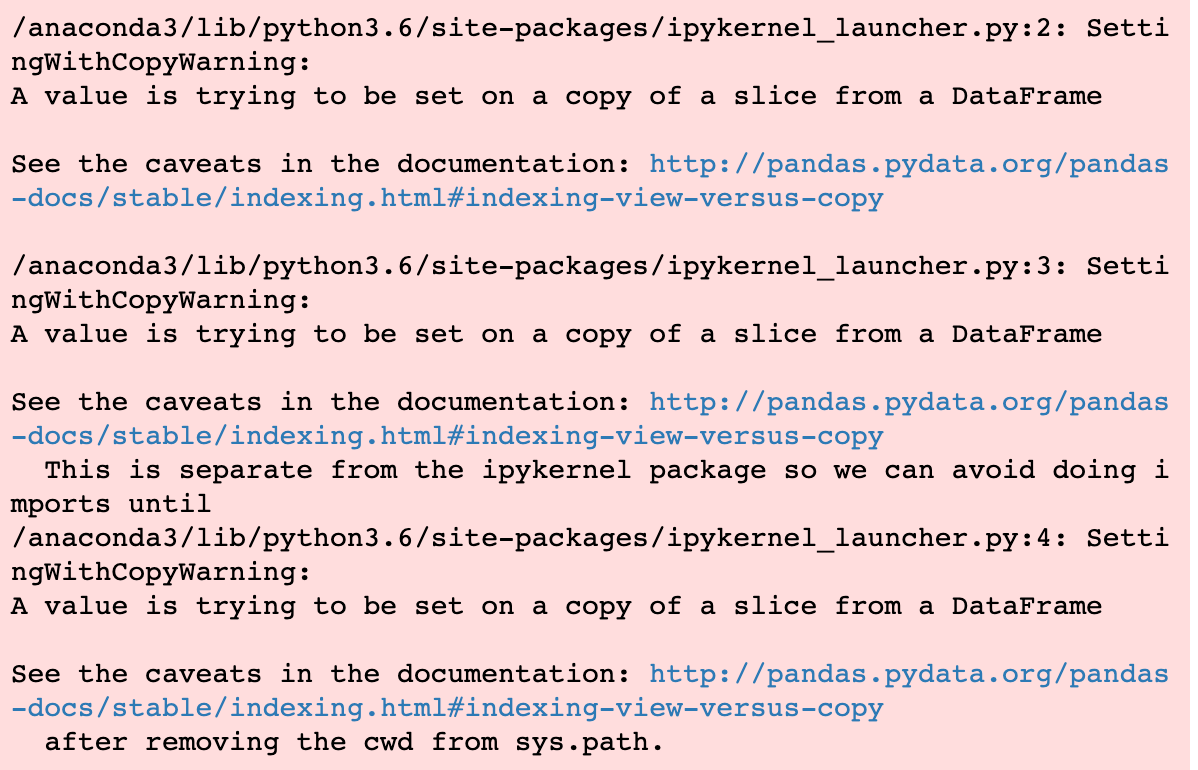
  
  
> [Pandas 中 SettingwithCopyWarning 的原理和解决方案](https://www.jianshu.com/p/72274ccb647a)


In [40]:
#对狗地位描述数量大于1个的值重新赋值
twitter_archive_clean.loc[twitter_archive_clean.dogs_stage == 'doggopupper', 'dogs_stage'] = 'multi'
twitter_archive_clean.loc[twitter_archive_clean.dogs_stage == 'doggofloofer', 'dogs_stage'] = 'multi'
twitter_archive_clean.loc[twitter_archive_clean.dogs_stage == 'doggopuppo', 'dogs_stage'] = 'multi'
#dogs_stage的空值代表没有等级的狗狗，用no_stage代替
twitter_archive_clean.dogs_stage = twitter_archive_clean.dogs_stage.replace('', 'no_stage')
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'],1)


#### test

In [41]:
twitter_archive_clean

tweet_id                 timestamp  \
0     892420643555336193 2017-08-01 16:23:56+00:00   
1     892177421306343426 2017-08-01 00:17:27+00:00   
2     891815181378084864 2017-07-31 00:18:03+00:00   
3     891689557279858688 2017-07-30 15:58:51+00:00   
4     891327558926688256 2017-07-29 16:00:24+00:00   
5     891087950875897856 2017-07-29 00:08:17+00:00   
6     890971913173991426 2017-07-28 16:27:12+00:00   
7     890729181411237888 2017-07-28 00:22:40+00:00   
8     890609185150312448 2017-07-27 16:25:51+00:00   
9     890240255349198849 2017-07-26 15:59:51+00:00   
10    890006608113172480 2017-07-26 00:31:25+00:00   
11    889880896479866881 2017-07-25 16:11:53+00:00   
12    889665388333682689 2017-07-25 01:55:32+00:00   
13    889638837579907072 2017-07-25 00:10:02+00:00   
14    889531135344209921 2017-07-24 17:02:04+00:00   
15    889278841981685760 2017-07-24 00:19:32+00:00   
16    888917238123831296 2017-07-23 00:22:39+00:00   
17    888804989199671297 2017-07-22 16:56:37+00:00   
18    888554962724278272 2017-07-22 00:23:06+00:00   
20    888078434458587136 2017-07-20 16:49:33+00:00   
21    887705289381826560 2017-07-19 16:06:48+00:00   
22    887517139158093824 2017-07-19 03:39:09+00:00   
23    887473957103951883 2017-07-19 00:47:34+00:00   
24    887343217045368832 2017-07-18 16:08:03+00:00   
25    887101392804085760 2017-07-18 00:07:08+00:00   
26    886983233522544640 2017-07-17 16:17:36+00:00   
27    886736880519319552 2017-07-16 23:58:41+00:00   
28    886680336477933568 2017-07-16 20:14:00+00:00   
29    886366144734445568 2017-07-15 23:25:31+00:00   
30    886267009285017600 2017-07-15 16:51:35+00:00   
...                  ...                       ...   
2326  666411507551481857 2015-11-17 00:24:19+00:00   
2327  666407126856765440 2015-11-17 00:06:54+00:00   
2328  666396247373291520 2015-11-16 23:23:41+00:00   
2329  666373753744588802 2015-11-16 21:54:18+00:00   
2330  666362758909284353 2015-11-16 21:10:36+00:00   
2331  666353288456101888 2015-11-16 20:32:58+00:00   
2332  666345417576210432 2015-11-16 20:01:42+00:00   
2333  666337882303524864 2015-11-16 19:31:45+00:00   
2334  666293911632134144 2015-11-16 16:37:02+00:00   
2335  666287406224695296 2015-11-16 16:11:11+00:00   
2336  666273097616637952 2015-11-16 15:14:19+00:00   
2337  666268910803644416 2015-11-16 14:57:41+00:00   
2338  666104133288665088 2015-11-16 04:02:55+00:00   
2339  666102155909144576 2015-11-16 03:55:04+00:00   
2340  666099513787052032 2015-11-16 03:44:34+00:00   
2341  666094000022159362 2015-11-16 03:22:39+00:00   
2342  666082916733198337 2015-11-16 02:38:37+00:00   
2343  666073100786774016 2015-11-16 01:59:36+00:00   
2344  666071193221509120 2015-11-16 01:52:02+00:00   
2345  666063827256086533 2015-11-16 01:22:45+00:00   
2346  666058600524156928 2015-11-16 01:01:59+00:00   
2347  666057090499244032 2015-11-16 00:55:59+00:00   
2348  666055525042405380 2015-11-16 00:49:46+00:00   
2349  666051853826850816 2015-11-16 00:35:11+00:00   
2350  666050758794694657 2015-11-16 00:30:50+00:00   
2351  666049248165822465 2015-11-16 00:24:50+00:00   
2352  666044226329800704 2015-11-16 00:04:52+00:00   
2353  666033412701032449 2015-11-15 23:21:54+00:00   
2354  666029285002620928 2015-11-15 23:05:30+00:00   
2355  666020888022790149 2015-11-15 22:32:08+00:00   

                                                                                                                                                                        text  \
0                                                              This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1         This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                          This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may stri

In [42]:
twitter_archive_clean.dogs_stage.value_counts()

no_stage    1831
pupper       224
doggo         75
puppo         24
multi         12
floofer        9
Name: dogs_stage, dtype: int64

###  issue: 无效狗狗评分分母数值

#### define： 查找分母无效值，在对应的text文本中调查重新提取，或做删除处理

#### code 

In [43]:
twitter_archive_clean.rating_denominator.value_counts()

10     2153
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [44]:
#构造评分分母不等于10的dataframe id_text_denominator
id_text_denominator = twitter_archive_clean[twitter_archive_clean.rating_denominator != 10][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]
id_text_denominator


tweet_id  \
313   835246439529840640   
342   832088576586297345   
433   820690176645140481   
516   810984652412424192   
902   758467244762497024   
1068  740373189193256964   
1120  731156023742988288   
1165  722974582966214656   
1202  716439118184652801   
1228  713900603437621249   
1254  710658690886586372   
1274  709198395643068416   
1351  704054845121142784   
1433  697463031882764288   
1598  686035780142297088   
1634  684225744407494656   
1635  684222868335505415   
1662  682962037429899265   
1663  682808988178739200   
1779  677716515794329600   
1843  675853064436391936   
2335  666287406224695296   

                                                                                                                                                                           text  \
313                                                                          @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho   
342                                                                                                                                    @docmisterio account started on 11/15/15   
433                                                                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
516   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
902                                                                                              Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
1068                               After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
1120                                                  Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
1165                                                                                                           Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   
1202                                                      This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1228                                                                              Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
1254                                                               Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
1274                         From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1351                                                                                         Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1433                                                                               Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   
1598                                   Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating   
1634                                             Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3   
1635                               Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55   
1662                                This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/

In [45]:
#根据上面的text手动提取有效的分母分子数值并赋值
twitter_archive_clean.loc[313, 'rating_numerator'] = 13
twitter_archive_clean.loc[313, 'rating_denominator'] = 10
twitter_archive_clean.loc[1068, 'rating_numerator'] = 14
twitter_archive_clean.loc[1068, 'rating_denominator'] = 10
twitter_archive_clean.loc[1662, 'rating_numerator'] = 10
twitter_archive_clean.loc[1662, 'rating_denominator'] = 10
twitter_archive_clean.loc[2335, 'rating_numerator'] = 9
twitter_archive_clean.loc[2335, 'rating_denominator'] = 10

#删除text中没有评分的行
for i in [342, 516, 1663]:
    twitter_archive_clean = twitter_archive_clean.drop(i)
twitter_archive_clean

tweet_id                 timestamp  \
0     892420643555336193 2017-08-01 16:23:56+00:00   
1     892177421306343426 2017-08-01 00:17:27+00:00   
2     891815181378084864 2017-07-31 00:18:03+00:00   
3     891689557279858688 2017-07-30 15:58:51+00:00   
4     891327558926688256 2017-07-29 16:00:24+00:00   
5     891087950875897856 2017-07-29 00:08:17+00:00   
6     890971913173991426 2017-07-28 16:27:12+00:00   
7     890729181411237888 2017-07-28 00:22:40+00:00   
8     890609185150312448 2017-07-27 16:25:51+00:00   
9     890240255349198849 2017-07-26 15:59:51+00:00   
10    890006608113172480 2017-07-26 00:31:25+00:00   
11    889880896479866881 2017-07-25 16:11:53+00:00   
12    889665388333682689 2017-07-25 01:55:32+00:00   
13    889638837579907072 2017-07-25 00:10:02+00:00   
14    889531135344209921 2017-07-24 17:02:04+00:00   
15    889278841981685760 2017-07-24 00:19:32+00:00   
16    888917238123831296 2017-07-23 00:22:39+00:00   
17    888804989199671297 2017-07-22 16:56:37+00:00   
18    888554962724278272 2017-07-22 00:23:06+00:00   
20    888078434458587136 2017-07-20 16:49:33+00:00   
21    887705289381826560 2017-07-19 16:06:48+00:00   
22    887517139158093824 2017-07-19 03:39:09+00:00   
23    887473957103951883 2017-07-19 00:47:34+00:00   
24    887343217045368832 2017-07-18 16:08:03+00:00   
25    887101392804085760 2017-07-18 00:07:08+00:00   
26    886983233522544640 2017-07-17 16:17:36+00:00   
27    886736880519319552 2017-07-16 23:58:41+00:00   
28    886680336477933568 2017-07-16 20:14:00+00:00   
29    886366144734445568 2017-07-15 23:25:31+00:00   
30    886267009285017600 2017-07-15 16:51:35+00:00   
...                  ...                       ...   
2326  666411507551481857 2015-11-17 00:24:19+00:00   
2327  666407126856765440 2015-11-17 00:06:54+00:00   
2328  666396247373291520 2015-11-16 23:23:41+00:00   
2329  666373753744588802 2015-11-16 21:54:18+00:00   
2330  666362758909284353 2015-11-16 21:10:36+00:00   
2331  666353288456101888 2015-11-16 20:32:58+00:00   
2332  666345417576210432 2015-11-16 20:01:42+00:00   
2333  666337882303524864 2015-11-16 19:31:45+00:00   
2334  666293911632134144 2015-11-16 16:37:02+00:00   
2335  666287406224695296 2015-11-16 16:11:11+00:00   
2336  666273097616637952 2015-11-16 15:14:19+00:00   
2337  666268910803644416 2015-11-16 14:57:41+00:00   
2338  666104133288665088 2015-11-16 04:02:55+00:00   
2339  666102155909144576 2015-11-16 03:55:04+00:00   
2340  666099513787052032 2015-11-16 03:44:34+00:00   
2341  666094000022159362 2015-11-16 03:22:39+00:00   
2342  666082916733198337 2015-11-16 02:38:37+00:00   
2343  666073100786774016 2015-11-16 01:59:36+00:00   
2344  666071193221509120 2015-11-16 01:52:02+00:00   
2345  666063827256086533 2015-11-16 01:22:45+00:00   
2346  666058600524156928 2015-11-16 01:01:59+00:00   
2347  666057090499244032 2015-11-16 00:55:59+00:00   
2348  666055525042405380 2015-11-16 00:49:46+00:00   
2349  666051853826850816 2015-11-16 00:35:11+00:00   
2350  666050758794694657 2015-11-16 00:30:50+00:00   
2351  666049248165822465 2015-11-16 00:24:50+00:00   
2352  666044226329800704 2015-11-16 00:04:52+00:00   
2353  666033412701032449 2015-11-15 23:21:54+00:00   
2354  666029285002620928 2015-11-15 23:05:30+00:00   
2355  666020888022790149 2015-11-15 22:32:08+00:00   

                                                                                                                                                                        text  \
0                                                              This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1         This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                          This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may stri

#### test 

In [46]:
twitter_archive_clean.rating_denominator.value_counts()

10     2157
50        3
80        2
20        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
Name: rating_denominator, dtype: int64

In [47]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id              2172 non-null object
timestamp             2172 non-null datetime64[ns, UTC]
text                  2172 non-null object
rating_numerator      2172 non-null int64
rating_denominator    2172 non-null int64
dogs_stage            2172 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 118.8+ KB


In [48]:
twitter_archive_clean.rating_numerator.value_counts()

12      500
10      443
11      425
13      308
9       156
8        98
7        53
14       44
5        36
6        32
3        19
4        17
2         9
1         7
420       2
0         2
1776      1
44        1
121       1
99        1
75        1
45        1
27        1
17        1
15        1
26        1
50        1
666       1
60        1
80        1
84        1
88        1
144       1
182       1
204       1
143       1
165       1
Name: rating_numerator, dtype: int64

### issue: 无效的评分分子数值

#### define： 取出评分分子数值大于15和评分分子小于2的text文本，调查有效性，删除异常数，修改不准确的数值

#### code

In [49]:
twitter_archive_clean.rating_numerator.value_counts()

12      500
10      443
11      425
13      308
9       156
8        98
7        53
14       44
5        36
6        32
3        19
4        17
2         9
1         7
420       2
0         2
1776      1
44        1
121       1
99        1
75        1
45        1
27        1
17        1
15        1
26        1
50        1
666       1
60        1
80        1
84        1
88        1
144       1
182       1
204       1
143       1
165       1
Name: rating_numerator, dtype: int64

In [50]:
# 调查评分分子有效性
id_text_numerator_15 = twitter_archive_clean[twitter_archive_clean.rating_numerator > 15][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]
id_text_numerator_15

tweet_id  \
55    881633300179243008   
188   855862651834028034   
189   855860136149123072   
290   838150277551247360   
433   820690176645140481   
695   786709082849828864   
763   778027034220126208   
902   758467244762497024   
979   749981277374128128   
1120  731156023742988288   
1202  716439118184652801   
1228  713900603437621249   
1254  710658690886586372   
1274  709198395643068416   
1351  704054845121142784   
1433  697463031882764288   
1634  684225744407494656   
1635  684222868335505415   
1712  680494726643068929   
1779  677716515794329600   
1843  675853064436391936   
2074  670842764863651840   

                                                                                                                                                                   text  \
55                                                                          @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s   
188                                                                              @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research   
189                               @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10   
290                                                                                                                                                  @markhoppus 182/10   
433                                                                 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
695                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
902                                                                                      Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
979                                                                                      This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh   
1120                                          Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
1202                                              This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1228                                                                      Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
1254                                                       Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
1274                 From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1351                                                                                 Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1433                                                                       Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   
1634                                     Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3   
1635                       Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55   
1712                                                         Here we have uncovered an entire battalion of holiday puppers

In [51]:
#根据以上text文本手动修改不准确的分子数值
twitter_archive_clean.loc[55, 'rating_numerator'] = 15
twitter_archive_clean.loc[695, 'rating_numerator'] = 9.75
twitter_archive_clean.loc[763, 'rating_numerator'] = 11.27
twitter_archive_clean.loc[1712, 'rating_numerator'] = 11.26

In [52]:
#删除评分分子特别大的异常值
for i in [188, 189, 979, 2074]:
    twitter_archive_clean = twitter_archive_clean.drop(i)

In [53]:
#调查评分分子数小于2的有效性
id_text_numerator_2 = twitter_archive_clean[twitter_archive_clean.rating_numerator < 2][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]
id_text_numerator_2

tweet_id  \
315   835152434251116546   
1016  746906459439529985   
1446  696490539101908992   
1869  675153376133427200   
1940  673716320723169284   
2038  671550332464455680   
2091  670783437142401025   
2261  667549055577362432   
2338  666104133288665088   

                                                                                                                                              text  \
315                              When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag   
1016                       PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX   
1446                                         After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me   
1869                     What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0   
1940                                                      The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you   
2038       After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes   
2091      Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO   
2261  Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx   
2338        Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX   

      rating_numerator  rating_denominator  
315                0.0                  10  
1016               0.0                  10  
1446               1.0                  10  
1869               1.0                  10  
1940               1.0                  10  
2038               1.0                  10  
2091               1.0                  10  
2261               1.0                  10  
2338               1.0                  10

In [54]:
for i in id_text_numerator_2.index:
    pp.pprint(str(i) + ' : ' + id_text_numerator_2.loc[i].text)

("315 : When you're so blinded by your systematic plagiarism that you forget "
 'what day it is. 0/10 https://t.co/YbEJPkg4Ag')
("1016 : PUPDATE: can't see any. Even if I could, I couldn't reach them to "
 'pet. 0/10 much disappointment https://t.co/c7WXaB2nqX')
('1446 : After reading the comments I may have overestimated this pup. '
 'Downgraded to a 1/10. Please forgive me')
('1869 : What kind of person sends in a picture without a dog in it? 1/10 just '
 "because that's a nice table https://t.co/RDXCfk8hK0")
("1940 : The millennials have spoken and we've decided to immediately demote "
 'to a 1/10. Thank you')
('2038 : After 22 minutes of careful deliberation this dog is being demoted to '
 'a 1/10. The longer you look at him the more terrifying he becomes')
("2091 : Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't "
 "bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO")
('2261 : Never seen dog like this. Breathes heavy. Tilts head in a pattern. 

In [55]:
#由于评分分子存在不是整数的数值，最后做一下数值类型转换
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype(float)
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)

#### text

In [56]:
twitter_archive_clean.rating_denominator.value_counts()

10.0     2153
50.0        3
80.0        2
20.0        2
150.0       1
110.0       1
90.0        1
130.0       1
70.0        1
170.0       1
120.0       1
40.0        1
Name: rating_denominator, dtype: int64

In [57]:
twitter_archive_clean.rating_numerator.value_counts()

12.00     500
10.00     443
11.00     425
13.00     308
9.00      156
8.00       98
7.00       53
14.00      44
5.00       36
6.00       32
3.00       19
4.00       17
2.00        9
1.00        7
15.00       2
0.00        2
84.00       1
143.00      1
50.00       1
182.00      1
60.00       1
44.00       1
144.00      1
88.00       1
11.26       1
11.27       1
121.00      1
9.75        1
99.00       1
204.00      1
45.00       1
165.00      1
80.00       1
Name: rating_numerator, dtype: int64

In [58]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id              2168 non-null object
timestamp             2168 non-null datetime64[ns, UTC]
text                  2168 non-null object
rating_numerator      2168 non-null float64
rating_denominator    2168 non-null float64
dogs_stage            2168 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), object(3)
memory usage: 118.6+ KB


> **评分清理优化思路**
评分主要是使用手动方式清理,将评分的问题归类使用编程方式清理,为什么要用编程方式清理？
在手动检查清洗的过程中发现了有一些带小数点的数据，比如 9.75，这样的数据之所以被检查出来是因为 75 太大了，如果有的小数点后面的数字比较小，比如 13.5，那么这个小数评分现在的检查手段就检查不到，没办法修改完全。
参考上面评估示例中的截图，可以总结几种评分的错误类型
+ 1）分子是小数，但是只提取了小数点后面的数字的情况，比如 11.26/10，提取为了 26/10；
+ 2）多只狗狗评的总分：99/90，规律是：分母是10的N倍，且分子可以被 N 整除；
+ 3）同一个推特中存在两处分数形式的数字，提取的是第一个，但是可能第二个才是正确的：@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
+ 4）比较单独的错误，比如 24/7 指的是 7 天 24 小时，并不是一个评分，这条推文中也没有具体的评分，可以 drop 掉；

> **总结起来发现评分的规律是，分子存在小数形式，分母都是 10 的倍数且不等于 0**

第一种清理方法：可以利用这些评分的总结特征进行重新提取，先使用 extract 提取到前一个匹配值，然后再使用 findall 检查有多个评分的情况

> **method1**:

```python
# 提取出的分子是带有小数点的，分母为非0的10的倍数
rating = twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/([1-9]+[0]+)', expand = True)
# 提取出来的结果是个 dataframe 数据集，有两列，分别命名为分子和分母
rating.columns = ['rating_numerator', 'rating_denominator']
# 用新提取的数据替换掉原有的数据，记得修改数据类型为 float 类型，因为有可能存在小数
twitter_archive_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = rating['rating_denominator'].astype(float)

```
>针对有多个分数的情况，因为具体涉及到的问题不同，我们可以使用 findall 找出所有 text 中有多个分数的数据，然后将其筛选出来，查看具体是哪种情况，单独处理，比如有的需要取后一个结果，有的可能要取均值等(下面的代码只提供了检查情况的功能，具体的清洗要同学自己选择处理)

> 
```python
#检查提取了两个 score 的情况
twitter_archive_clean['scores'] = twitter_archive_clean['text'].str.findall('((?:\d+\.)?\d+\/[1-9]+[0]+)')
twitter_archive_clean['score_counts'] = twitter_archive_clean['scores'].apply(lambda x: len(set(x)))
twitter_archive_clean[twitter_archive_clean['score_counts']>1][['text','scores','score_counts']]
```

第二种清理方法：如果想要简单统一处理，比如将每条推特中最后一个评分作为记录下来的评分，可以直接取 findall 结果列表的 -1 位置的值

> **method2:**

```python
twitter_archive_clean['last_score'] = twitter_archive_clean['text'].str.findall('((?:\d+\.)?\d+/[1-9]+[0]+)').apply(lambda x: x[-1] if len(x) > 0 else x)
rating = twitter_archive_clean['last_score'].str.split('/',n=1, expand=True)
# 提取出来的结果是个 dataframe 数据集，有两列，分别命名为分子和分母
rating.columns = ['rating_numerator', 'rating_denominator']
twitter_archive_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = rating['rating_denominator'].astype(float)
```

> 如果想要统一将评分修改为分母为 10 的话，可以使用向量运算

```python
# 新的分子等于”原来的分子 / 原来的分母 * 10“
twitter_archive_clean['rating_numerator']  = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'] *10
# 将分子修改完毕后，可以直接为分母赋值为 10
twitter_archive_clean['rating_denominator'] = 10
```

> 有用链接：
+ [pandas.Series.str.extract](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html)
+ [pandas.Series.str.findall](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.findall.html)
+ [pandas.Series.str.split](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html)
+ [for 循环和 apply 函数](http://discussions.youdaxue.com/t/for-apply-pandas/64971)
+ [项目可能会用到的正则表达式元字符、语法](https://discussions.youdaxue.com/t/topic/64079)

## image_prediction_clean

### issue: jpg_url出现66个重复项

#### define：删除jpg_url 重复的行

#### code 

In [59]:
image_prediction_clean = image_prediction_clean.drop_duplicates(subset='jpg_url', keep='last')

#### test 

In [60]:
image_prediction_clean.duplicated().sum()

0

In [61]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


In [62]:
image_prediction_clean.tweet_id = image_prediction_clean.tweet_id.astype(str)

## tweety_json_clean

### issue: 数据类型不正确，应该为数值


#### define: 转换favorites_count，retweet_count数据类型为数值


#### code 

In [63]:
tweet_json_clean.favorites_count = tweet_json_clean.favorites_count.astype(int)
tweet_json_clean.retweet_count = tweet_json_clean.retweet_count.astype(int)
tweet_json_clean.tweet_id = tweet_json_clean.tweet_id.astype(str)

#### test 

In [64]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id           2352 non-null object
favorites_count    2352 non-null int64
retweet_count      2352 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [65]:
tweet_json_clean.head()

tweet_id  favorites_count  retweet_count
0  892420643555336193            39492           8842
1  892177421306343426            33786           6480
2  891815181378084864            25445           4301
3  891689557279858688            42863           8925
4  891327558926688256            41016           9721

### issue: 三个表应该为整合为一个表 

#### define： 三个数据集按照tweet_id合并为主数据集twitter_archive_master，merge 时选择 inner 方式，这样可以删掉没有图片的推文条目

#### code

In [66]:
df = pd.merge(twitter_archive_clean, image_prediction_clean, on='tweet_id')
twitter_archive_master = pd.merge(df, tweet_json_clean, on='tweet_id')

#### test 

In [67]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 0 to 1924
Data columns (total 19 columns):
tweet_id              1925 non-null object
timestamp             1925 non-null datetime64[ns, UTC]
text                  1925 non-null object
rating_numerator      1925 non-null float64
rating_denominator    1925 non-null float64
dogs_stage            1925 non-null object
jpg_url               1925 non-null object
img_num               1925 non-null int64
p1                    1925 non-null object
p1_conf               1925 non-null float64
p1_dog                1925 non-null bool
p2                    1925 non-null object
p2_conf               1925 non-null float64
p2_dog                1925 non-null bool
p3                    1925 non-null object
p3_conf               1925 non-null float64
p3_dog                1925 non-null bool
favorites_count       1925 non-null int64
retweet_count         1925 non-null int64
dtypes: bool(3), datetime64[ns, UTC](1), float64(5), int64(3), obje

In [68]:
twitter_archive_master.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

   rating_numerator  rating_denominator dogs_stage  \
0              13.0                10.0   no_stage   
1              13.0                10.0   no_stage   
2              12.0                10.0   no_stage   
3              13.0                10.0   no_stage   
4              12.0                10.0   no_stage   

                                           jpg_url  img_num           p1  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1       orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1    Chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1    Chihuahua   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1  paper_towel   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2       basset   

    p1_conf  p1_dog                  p2   p2_conf  p2_dog  \
0  0.097049   False               bagel  0.085851   False   
1  0.323581    True            Pekinese  0.090647    True   
2  0.716012    True            malamute  0.078253    True   
3  0.170278   False  Labrador_retriever  0.168086    True   
4  0.555712    True    English_springer  0.225770    True   

                            p3   p3_conf  p3_dog  favorites_count  \
0                       banana  0.076110   False            39492   
1                     papillon  0.068957    True            33786   
2                       kelpie  0.031379    True            25445   
3                      spatula  0.040836   False            42863   
4  German_short-haired_pointer  0.175219    True            41016   

   retweet_count  
0           8842  
1           6480  
2           4301  
3           8925  
4           9721

In [69]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 0 to 1924
Data columns (total 19 columns):
tweet_id              1925 non-null object
timestamp             1925 non-null datetime64[ns, UTC]
text                  1925 non-null object
rating_numerator      1925 non-null float64
rating_denominator    1925 non-null float64
dogs_stage            1925 non-null object
jpg_url               1925 non-null object
img_num               1925 non-null int64
p1                    1925 non-null object
p1_conf               1925 non-null float64
p1_dog                1925 non-null bool
p2                    1925 non-null object
p2_conf               1925 non-null float64
p2_dog                1925 non-null bool
p3                    1925 non-null object
p3_conf               1925 non-null float64
p3_dog                1925 non-null bool
favorites_count       1925 non-null int64
retweet_count         1925 non-null int64
dtypes: bool(3), datetime64[ns, UTC](1), float64(5), int64(3), obje

# Data storing

In [70]:
#以csv格式保存twitter_archive_master
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')

# Analysis and Visualization

## 加载数据 

In [71]:
#重新加载数据
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 19 columns):
tweet_id              1925 non-null int64
timestamp             1925 non-null object
text                  1925 non-null object
rating_numerator      1925 non-null float64
rating_denominator    1925 non-null float64
dogs_stage            1925 non-null object
jpg_url               1925 non-null object
img_num               1925 non-null int64
p1                    1925 non-null object
p1_conf               1925 non-null float64
p1_dog                1925 non-null bool
p2                    1925 non-null object
p2_conf               1925 non-null float64
p2_dog                1925 non-null bool
p3                    1925 non-null object
p3_conf               1925 non-null float64
p3_dog                1925 non-null bool
favorites_count       1925 non-null int64
retweet_count         1925 non-null int64
dtypes: bool(3), float64(5), int64(4), object(7)
memory usage: 246.3+ KB


In [72]:
#重新加载数据后timestamp数据类型重新转换
df.timestamp = pd.to_datetime(df.timestamp)


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 19 columns):
tweet_id              1925 non-null int64
timestamp             1925 non-null datetime64[ns, UTC]
text                  1925 non-null object
rating_numerator      1925 non-null float64
rating_denominator    1925 non-null float64
dogs_stage            1925 non-null object
jpg_url               1925 non-null object
img_num               1925 non-null int64
p1                    1925 non-null object
p1_conf               1925 non-null float64
p1_dog                1925 non-null bool
p2                    1925 non-null object
p2_conf               1925 non-null float64
p2_dog                1925 non-null bool
p3                    1925 non-null object
p3_conf               1925 non-null float64
p3_dog                1925 non-null bool
favorites_count       1925 non-null int64
retweet_count         1925 non-null int64
dtypes: bool(3), datetime64[ns, UTC](1), float64(5), int64(4), objec

In [74]:
df.dogs_stage.value_counts()

no_stage    1630
pupper       199
doggo         59
puppo         21
multi          9
floofer        7
Name: dogs_stage, dtype: int64

## EDA

### 探索favorites_count 与	retweet_count关系

#### 定义函数通过狗狗地位作为图例可视化 favorites_count 与 retweet_count关系

In [75]:
def plot_favorites_retweet():
    #复制原始数据
    df_dogs_stage = df.copy()
    #以狗狗地位的分类变量作为图例数据
    stage = ['no_stage', 'pupper', 'doggo', 'puppo', 'floofer', 'multi']
    #设置图像大小
    plt.figure(figsize=[12, 8])
    #按照狗狗地位（狗狗地位stage作为图例）依次完成x,y 坐标取数并且绘制散点图
    for i in stage:
        df_x_y = df_dogs_stage[df_dogs_stage.dogs_stage == i][['favorites_count','retweet_count']]
        #pp.pprint(prov)
        plt.scatter(x=df_x_y.favorites_count, # x轴数据
                    y=df_x_y.retweet_count,   # y轴数据
                    alpha=0.5)                # 散点的透明度
    plt.xlabel('Number of retweet_count', fontsize=14)
    plt.ylabel('Number of favorite_count', fontsize=14)
    plt.title('1-Correlation between retweets and favorite tweets-stage', fontsize=18)
    plt.legend(stage)#以狗狗地位作为图例
    return plt.show()    

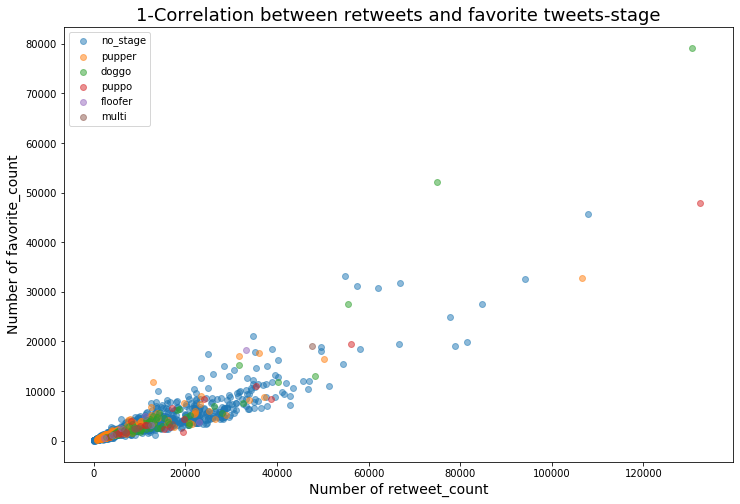

In [76]:
plot_favorites_retweet()

> 结论: 从图中可以看出推文转发量与点赞数有比较强的相关性，其中
         以狗狗地位pupper，doggo，puppo，floofer作为图例


### 探索 评分 与 retweet_count关系，评分与favorites_count关系

#### 定义函数，以评分（rating =  rating_numerator /  rating_denominator ）和 retweet_count 作为x, y 轴取数进行可视化

In [77]:
def plot_rating_retweet():
    df_rating = df.copy()
    #增加一列以评分’rating‘ 为列明的平分列
    df_rating['rating'] = df_rating.rating_numerator / df_rating.rating_denominator 
    plt.figure(figsize=[12, 8])
    stage = ['no_stage', 'pupper', 'doggo', 'puppo', 'floofer', 'multi']
    for i in stage:
        df_x_y = df_rating[df_rating.dogs_stage == i][['rating','retweet_count']]
        plt.scatter(x=df_x_y.retweet_count, 
                    y=df_x_y.rating,
                    alpha=0.5)
    plt.xlabel('Number of Retweet', fontsize=14)
    plt.ylabel('Rating', fontsize=14)
    plt.legend(stage)
    plt.title('2-Correlation between Retweets and Rating', fontsize=18)
    return plt.show()

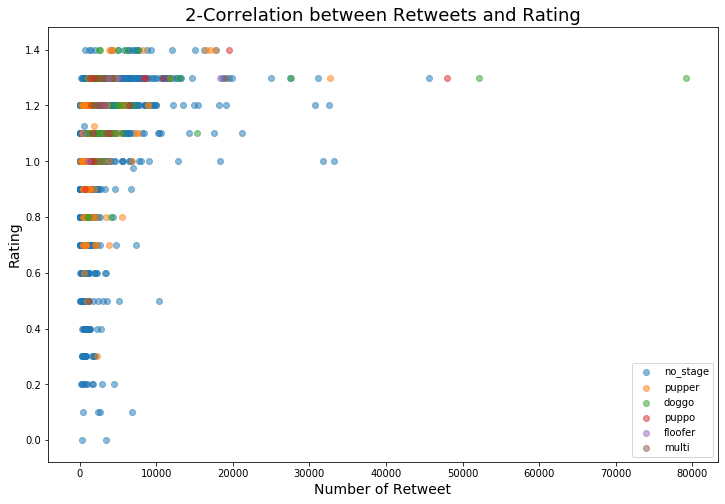

In [78]:
plot_rating_retweet()

>结论：从图中可以看出推文的转发数与狗狗的评分没有相关性!

#### 定义函数以rating和favorites_count作为x， y 轴取数进行可视化 

In [79]:
def plot_rating_favorites():
    df_rating = df.copy()
    df_rating['rating'] = df_rating.rating_numerator / df_rating.rating_denominator
    plt.figure(figsize=[12, 8])
    stage = ['no_stage', 'pupper', 'doggo', 'puppo', 'floofer', 'multi']
    for i in stage:
        df_x_y = df_rating[df_rating.dogs_stage == i][['rating','favorites_count']]
        plt.scatter(x=df_x_y.favorites_count, 
                    y=df_x_y.rating,
                    alpha=0.5)
    plt.xlabel('Number of Favorites', fontsize=14)
    plt.ylabel('Rating', fontsize=14)
    plt.legend(stage)
    plt.title('3-Correlation between Favorites and Rating', fontsize=18)
    return plt.show()

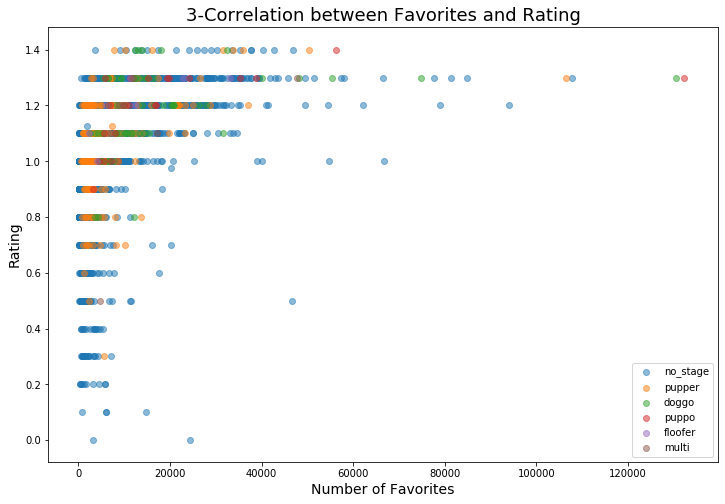

In [80]:
plot_rating_favorites()

> 结论：推文点赞数与狗狗评分数也没有相关性

### 探索p1 

#### 定义函数 以狗狗品种breed(p1)出现的次数大于20次的统计数据作为x轴和y轴取数进行可视化

In [81]:
def plot_breed():
    df_breed= df.copy()
    df1 = df_breed.p1.value_counts()[df_breed.p1.value_counts() > 20]
    df1.plot(kind='barh',figsize=[12, 8])
    plt.xlabel('Occurrences', fontsize=14)
    plt.ylabel('Dog’s Breed', fontsize=14)
    plt.title('4-Dog‘s Breed with more than 20 Occurrences',fontsize=18)
    return plt.show()    

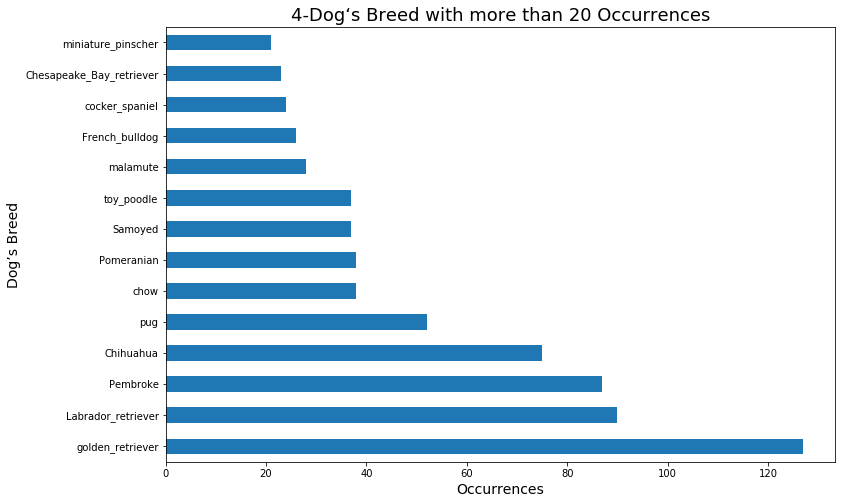

In [82]:
plot_breed()

> 出现在推文中前三名的狗狗品种是 golden_retriever, Labrador_retriever, Pembroke

## Conclusions 